# Problem Statement

The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

This dataset can be viewed as classification task. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.

What might be an interesting thing to do, is to set an arbitrary cutoff for the dependent variable (wine quality) at e.g. 7 or higher getting classified as 'good/1' and the remainder as 'not good/0'.
We will use machine learning to determine which physiochemical properties make a wine 'good'!
Data set - https://github.com/dsrscientist/DSData/blob/master/winequality-red.csv

# Importing Base Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import preprocessing

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

# Import Red Wine Dataset

In [2]:
df = pd.read_csv('winequality-red.csv')
df.head() #first 5 rows of red wine data set

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# Disciptive Analysis

In [3]:
#lets first summarize the data
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

Description - This data set has 12 columns where quality is the targetv variable which determines the quality of wine on a scale of 1 to 10
rest are the feature variables described as below-
- fixed acidity - It shows the acidity content level present in the wine making.
- volatile acidity - A measure of volatile acidity is used routinely as an indicator of wine spoilage.
- citric acid - It shows the citric acid concentration in the mixture of wine
- residual sugar - It shows the residual or left over amt of sugar which was there in the wine mixture
- chlorides - Cholorides tells the chlorine content level
- free sulphur dioxide - Sulphur dioxide content present in the mixture
- total sulphur dioxide - It calculates the total content of sulphur dioxide present in the whole mix
- density - density shows that how much hard or one may say the thickness of the wine made.
- pH - PH a figure expressing the acidity or alkalinity of a solution on a logarithmic scale .
- sulphates - Shows the sulphates content present in the mixture .
- alcohol - Alcohol says us the total content of alchohol present in the wine making

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Observation - 
- There are total 11 Feature Variable and all are having Float Type Numerical data
- Target Variable (ie) quality is of Integer type Numerical Data
- There are total 1599 entries is this dataset which is a good number
- total memory usage is - 150kb approx

In [5]:
df.describe(include='all')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


above description is showing the count, mean, standard deviation, minimum and maximum value of each column.
It is also showing how much data lies below the 25%, 50%, 75% respectively for each column

# Null Value Analysis

This analysis is to figure out if data contains any undefined or null value

In [6]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Observation - There is no null data in this dataset.

# Zero Value Analysis

In [7]:
(df==0).sum()

fixed acidity             0
volatile acidity          0
citric acid             132
residual sugar            0
chlorides                 0
free sulfur dioxide       0
total sulfur dioxide      0
density                   0
pH                        0
sulphates                 0
alcohol                   0
quality                   0
dtype: int64

Observation - we got to know that only citric acid column is having a minimum value as 0 which means no cirtic acid is present in such case. we don't need to replace this zero value with some mean or other value. we will keep this as it is.

# Drop Duplicate Data

In [8]:
#lets drop the duplicate rows if any
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1359 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1359 non-null   float64
 1   volatile acidity      1359 non-null   float64
 2   citric acid           1359 non-null   float64
 3   residual sugar        1359 non-null   float64
 4   chlorides             1359 non-null   float64
 5   free sulfur dioxide   1359 non-null   float64
 6   total sulfur dioxide  1359 non-null   float64
 7   density               1359 non-null   float64
 8   pH                    1359 non-null   float64
 9   sulphates             1359 non-null   float64
 10  alcohol               1359 non-null   float64
 11  quality               1359 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 138.0 KB


Observation - As we can see here, only 1359 out of 1599 entries left here, after removing duplicate data, so there was the presence of a lot of duplicate entries, which we removed.

# Interpreting wine quality as Good or Bad wine

As per the problem statement, if the wine quality is below 7, it is considered as bad, but if it is above 7, it is considered as a good wine

Lets add a categorical column to data set difining good or bad wine based on its quality

In [9]:
df.loc[(df['quality'] < 7.0), 'target']= 'bad'
df.loc[(df['quality'] >= 7.0), 'target']= 'good'
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,target
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,bad
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,bad
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,bad
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,bad
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,bad
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,bad
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,bad
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,bad


# Dropping the Quality column

In [10]:
df.drop('quality', inplace=True, axis = 1)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,target
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,bad
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,bad
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,bad
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,bad
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,bad
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,bad
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,bad
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,bad
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,bad


# Label Encoding for Target Variable

In [11]:
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'target'. 
df['target']= label_encoder.fit_transform(df['target'])
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,target
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,0
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,0
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


Observation-
- 0 at target column signifies poor wine quality
- 1 at target column signifies good wine quality

# Interpreting Relationship between Features and Target Variable

In [12]:
#separating the Features and Target Variable
x = df.drop(columns = ['target'])
y = df['target']

# Analysing Target Variable

In [13]:
y.unique()

array([0, 1])

In [14]:
y.nunique()

2

Observation - there are to unique values in the target variable as mentioned before 0 and 1

In [15]:
y.value_counts()

0    1175
1     184
Name: target, dtype: int64

<AxesSubplot:xlabel='target', ylabel='count'>

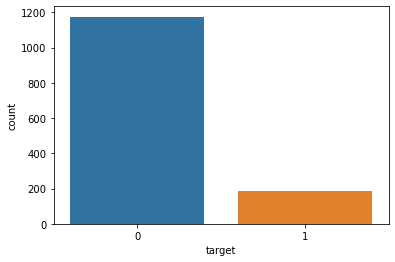

In [16]:
sns.countplot(y) #plotting the count for each unique entry under target variable

Observation - we can see that very less data (184) entries are present featuring a good wine

# Analysing Feature Variables

lets try to visualize how the features variable are affecting the target variable

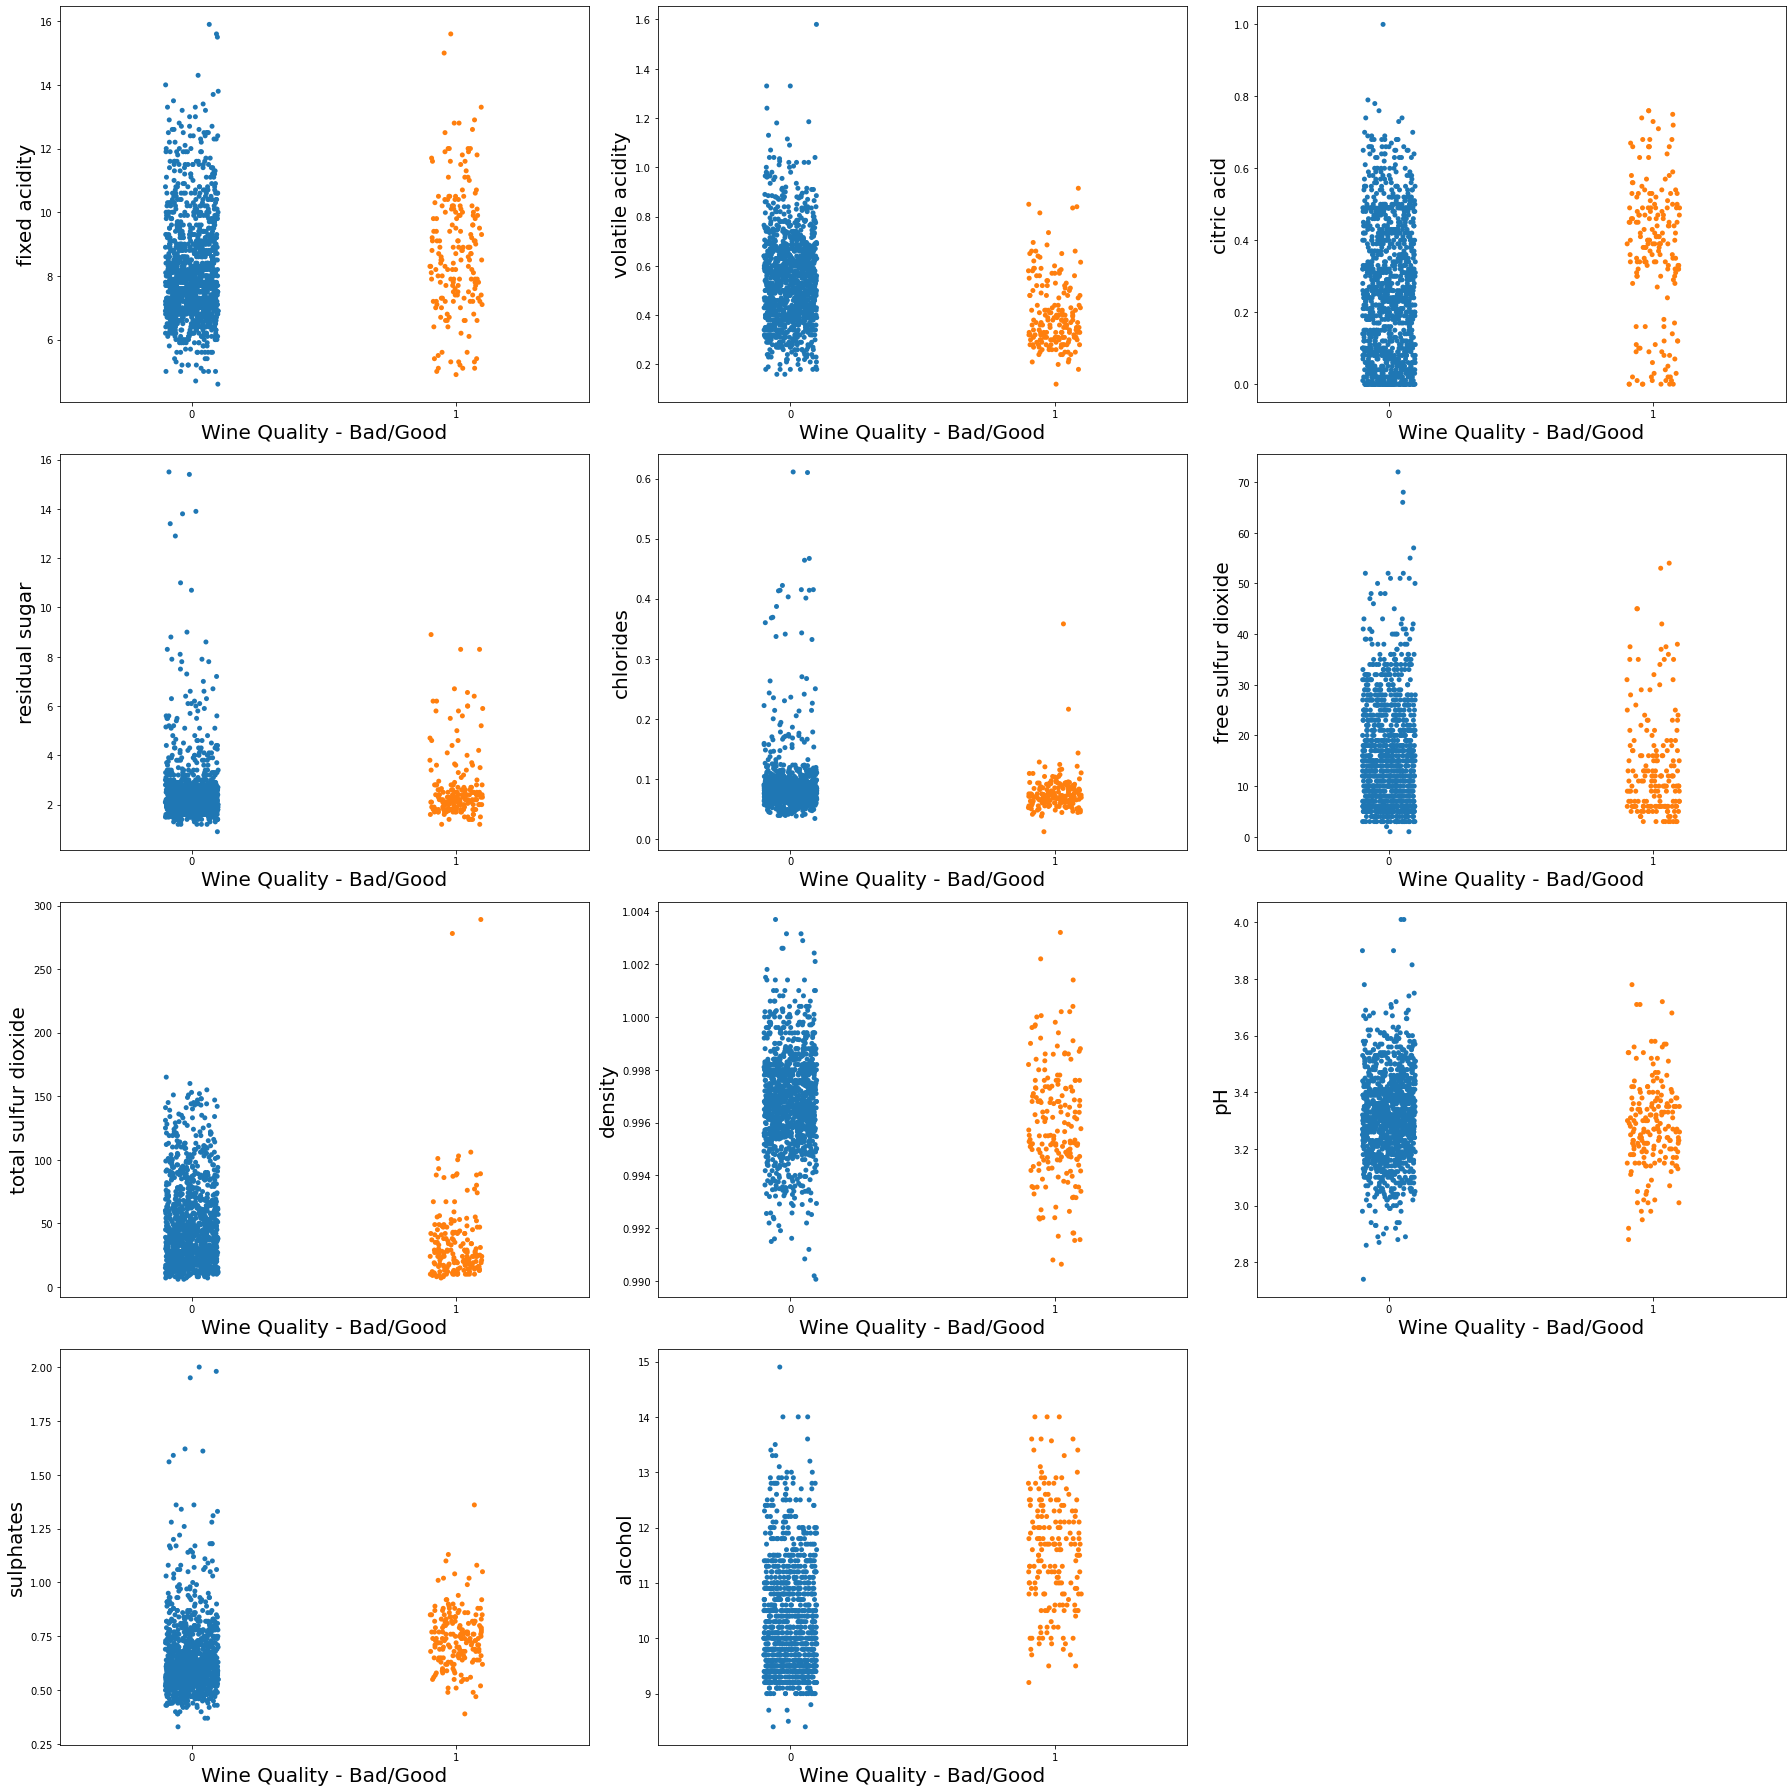

In [17]:
plt.figure(figsize=(25,25),facecolor='white')
plotnum=1
for col in x:
    if plotnum<=12:
        plt.subplot(4,3,plotnum)
        sns.stripplot(y,x[col])
        plt.xlabel('Wine Quality - Bad/Good',fontsize=20)
        plt.ylabel(col,fontsize=20)
    plotnum+=1
plt.tight_layout()

Observation - From the above plots we can observe that for good wine quality volatile acidity, residual sugar, chlorides, sulphur di oxide and sulphates should be less

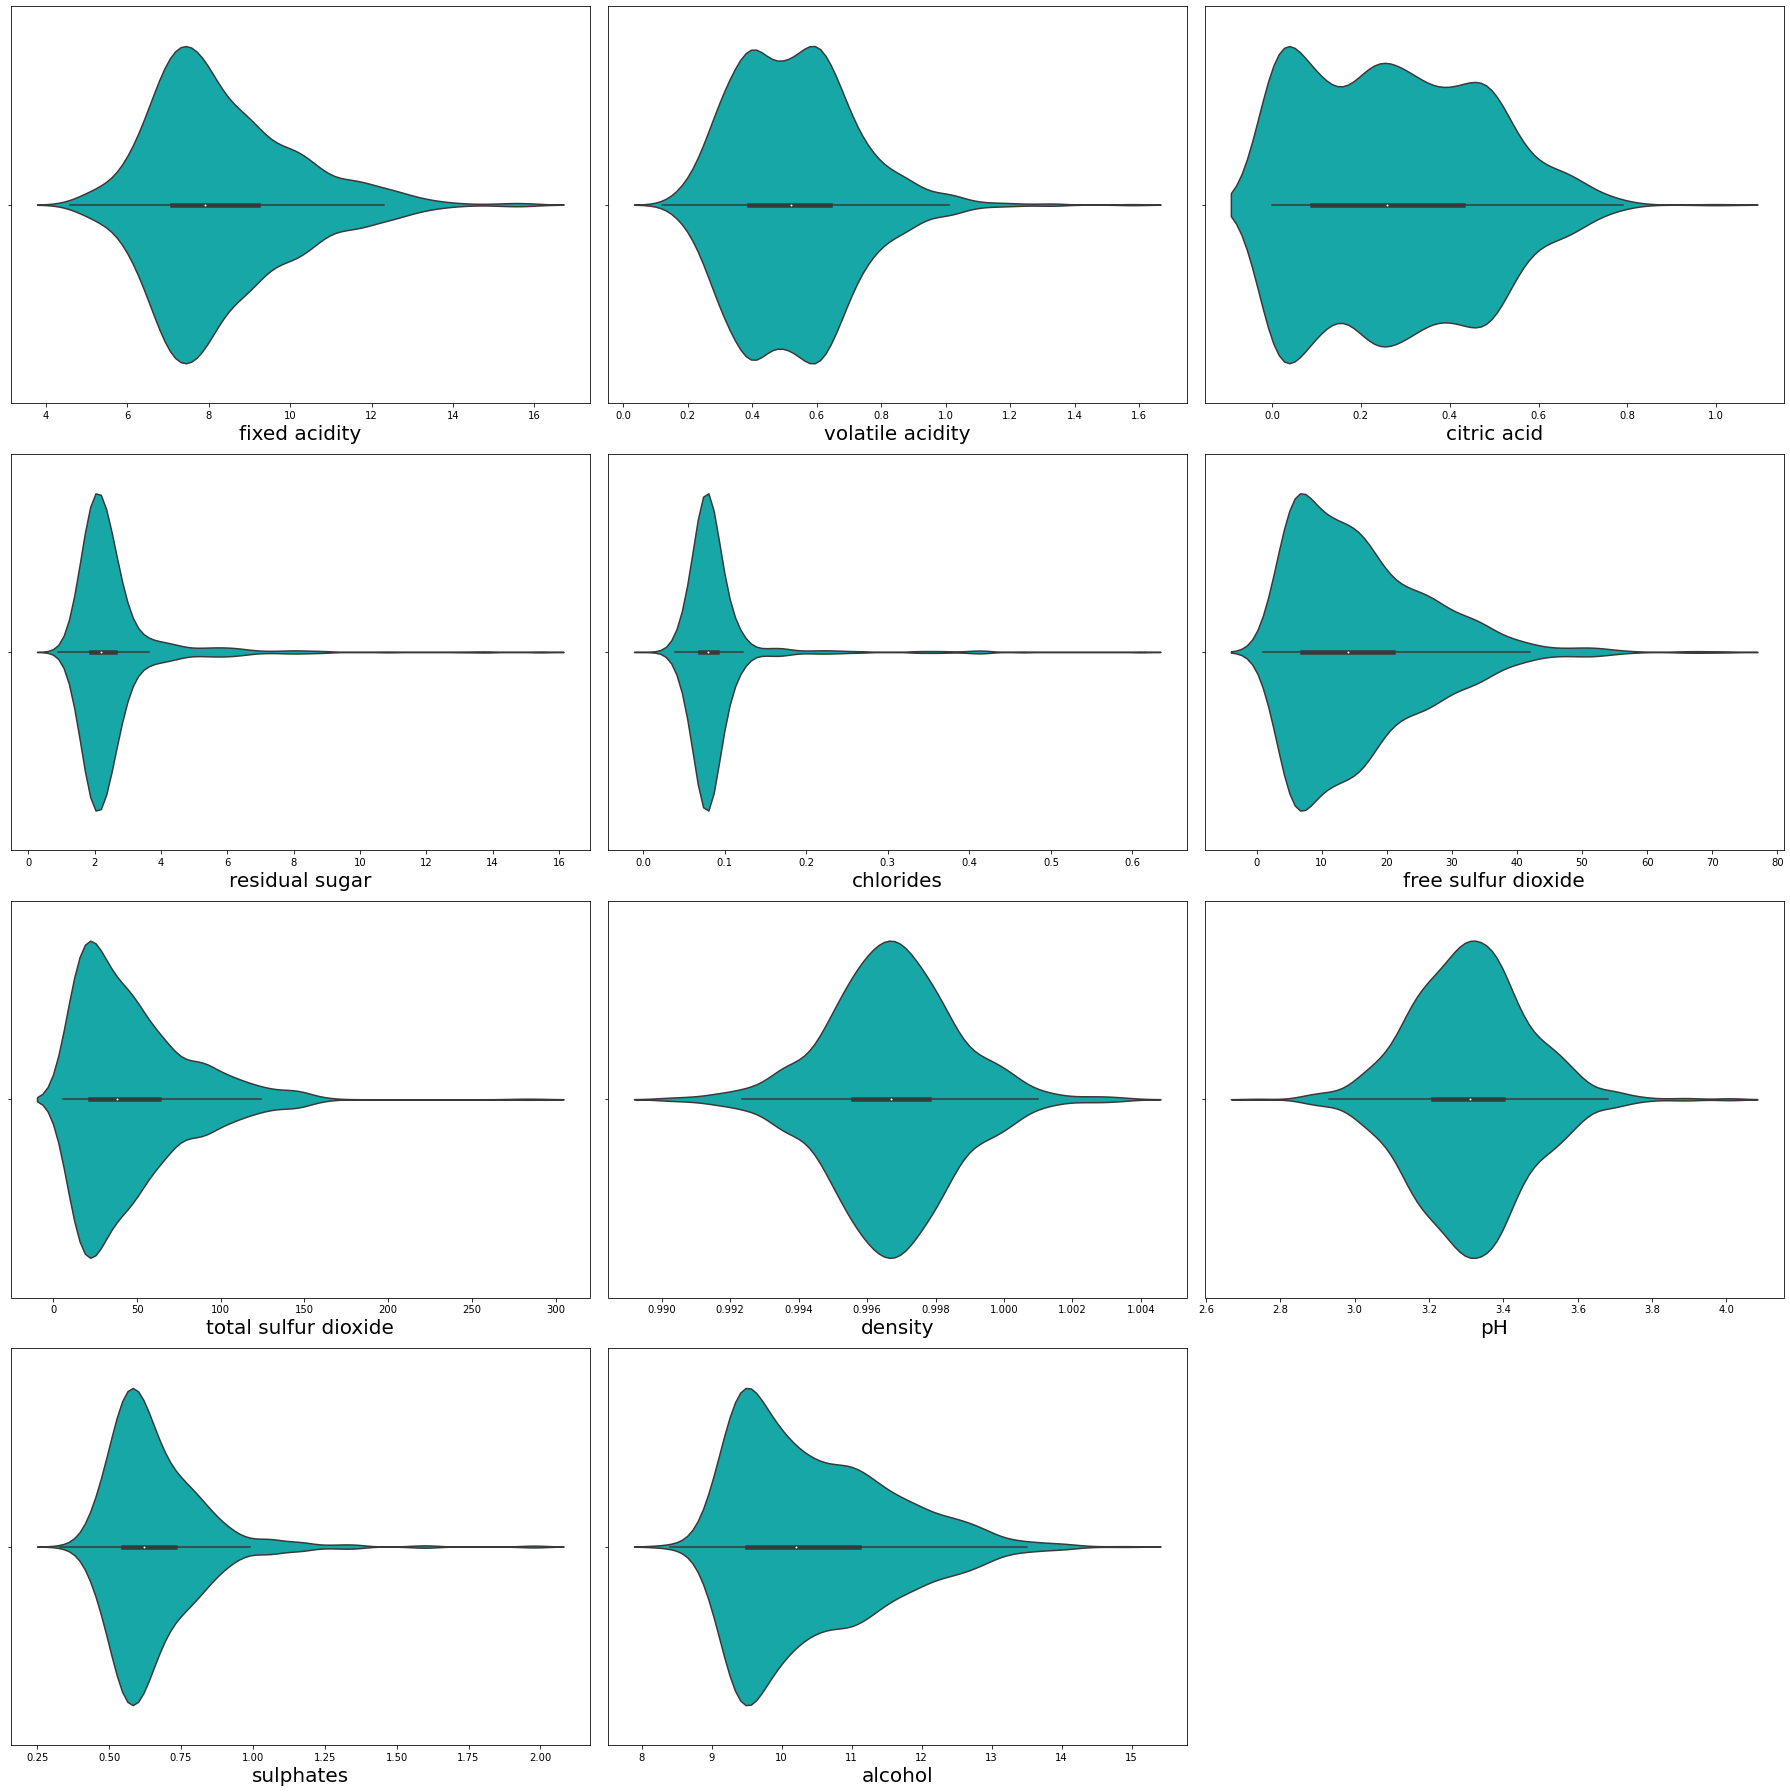

In [18]:
plt.figure(figsize=(25,25),facecolor='white')
plotnum=1
for col in x:
    if plotnum<=12:
        plt.subplot(4,3,plotnum)
        sns.violinplot(data=df, x = col, color = 'c')
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.tight_layout()

Observation - Above Plot is showing the density distribution of each Feature variable

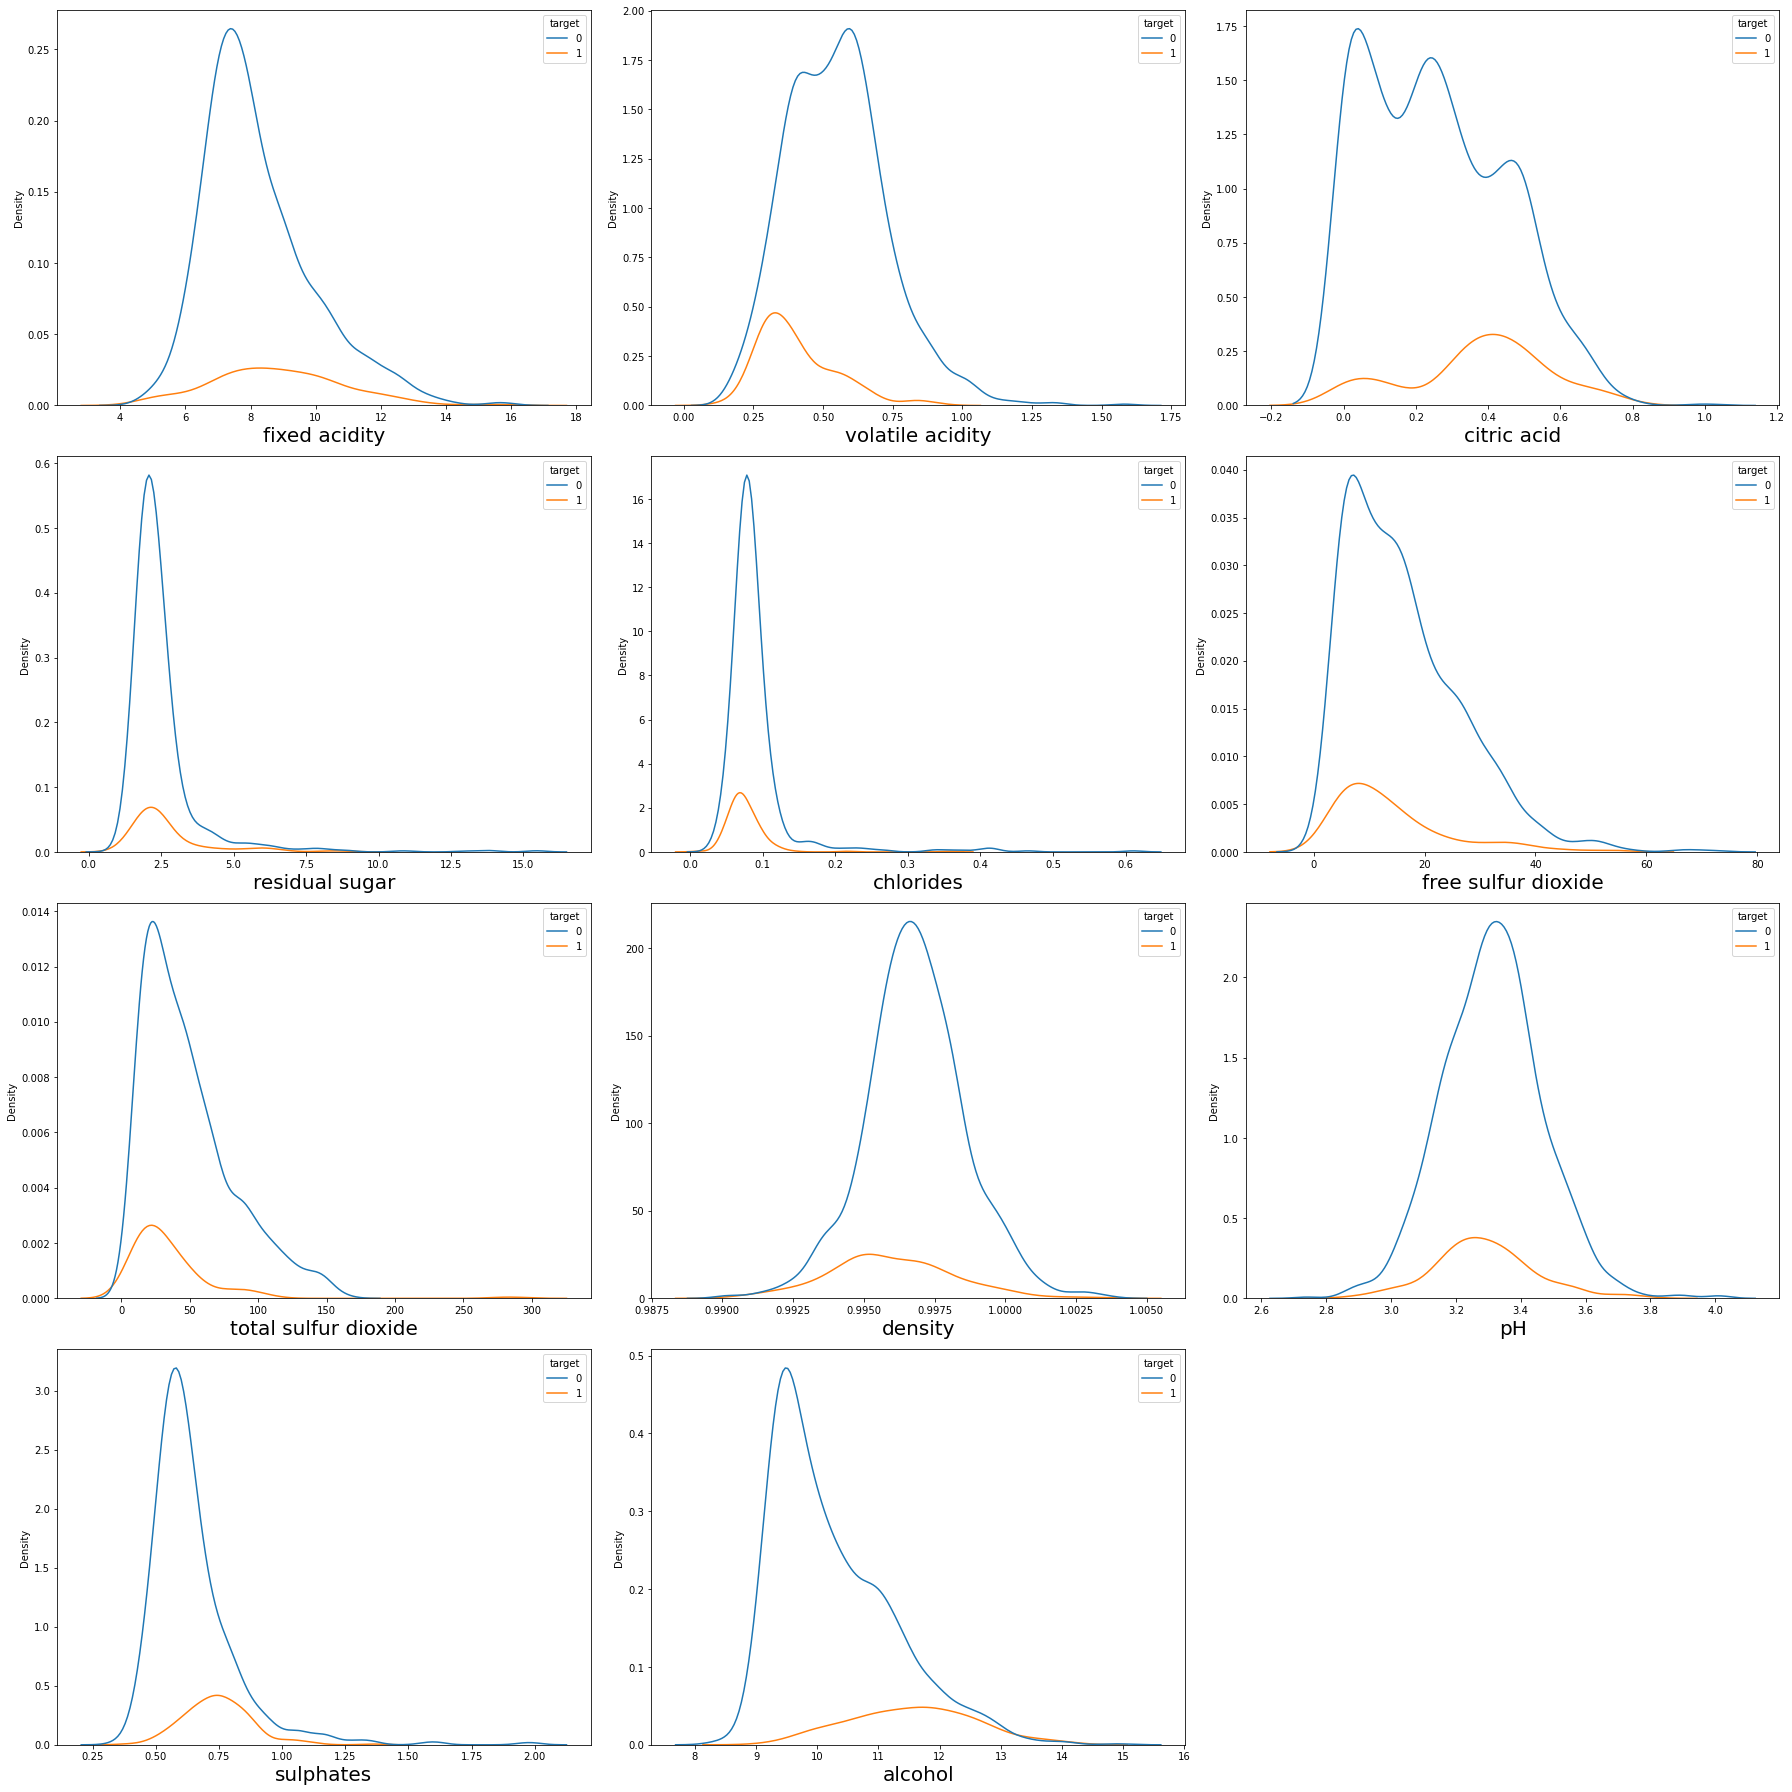

In [19]:
plt.figure(figsize=(25,25),facecolor='white')
plotnum=1
for col in x:
    if plotnum<=12:
        plt.subplot(4,3,plotnum)
        sns.kdeplot(data=df, x = col, hue = y)
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.tight_layout()

Observation - Above plot show the KDE plot for each feature variable with repect to the wine quality, we can see here data is much skewed but it can be easily observed that good quality wine containes lesser amount of featured components 

# Visualizing all data together

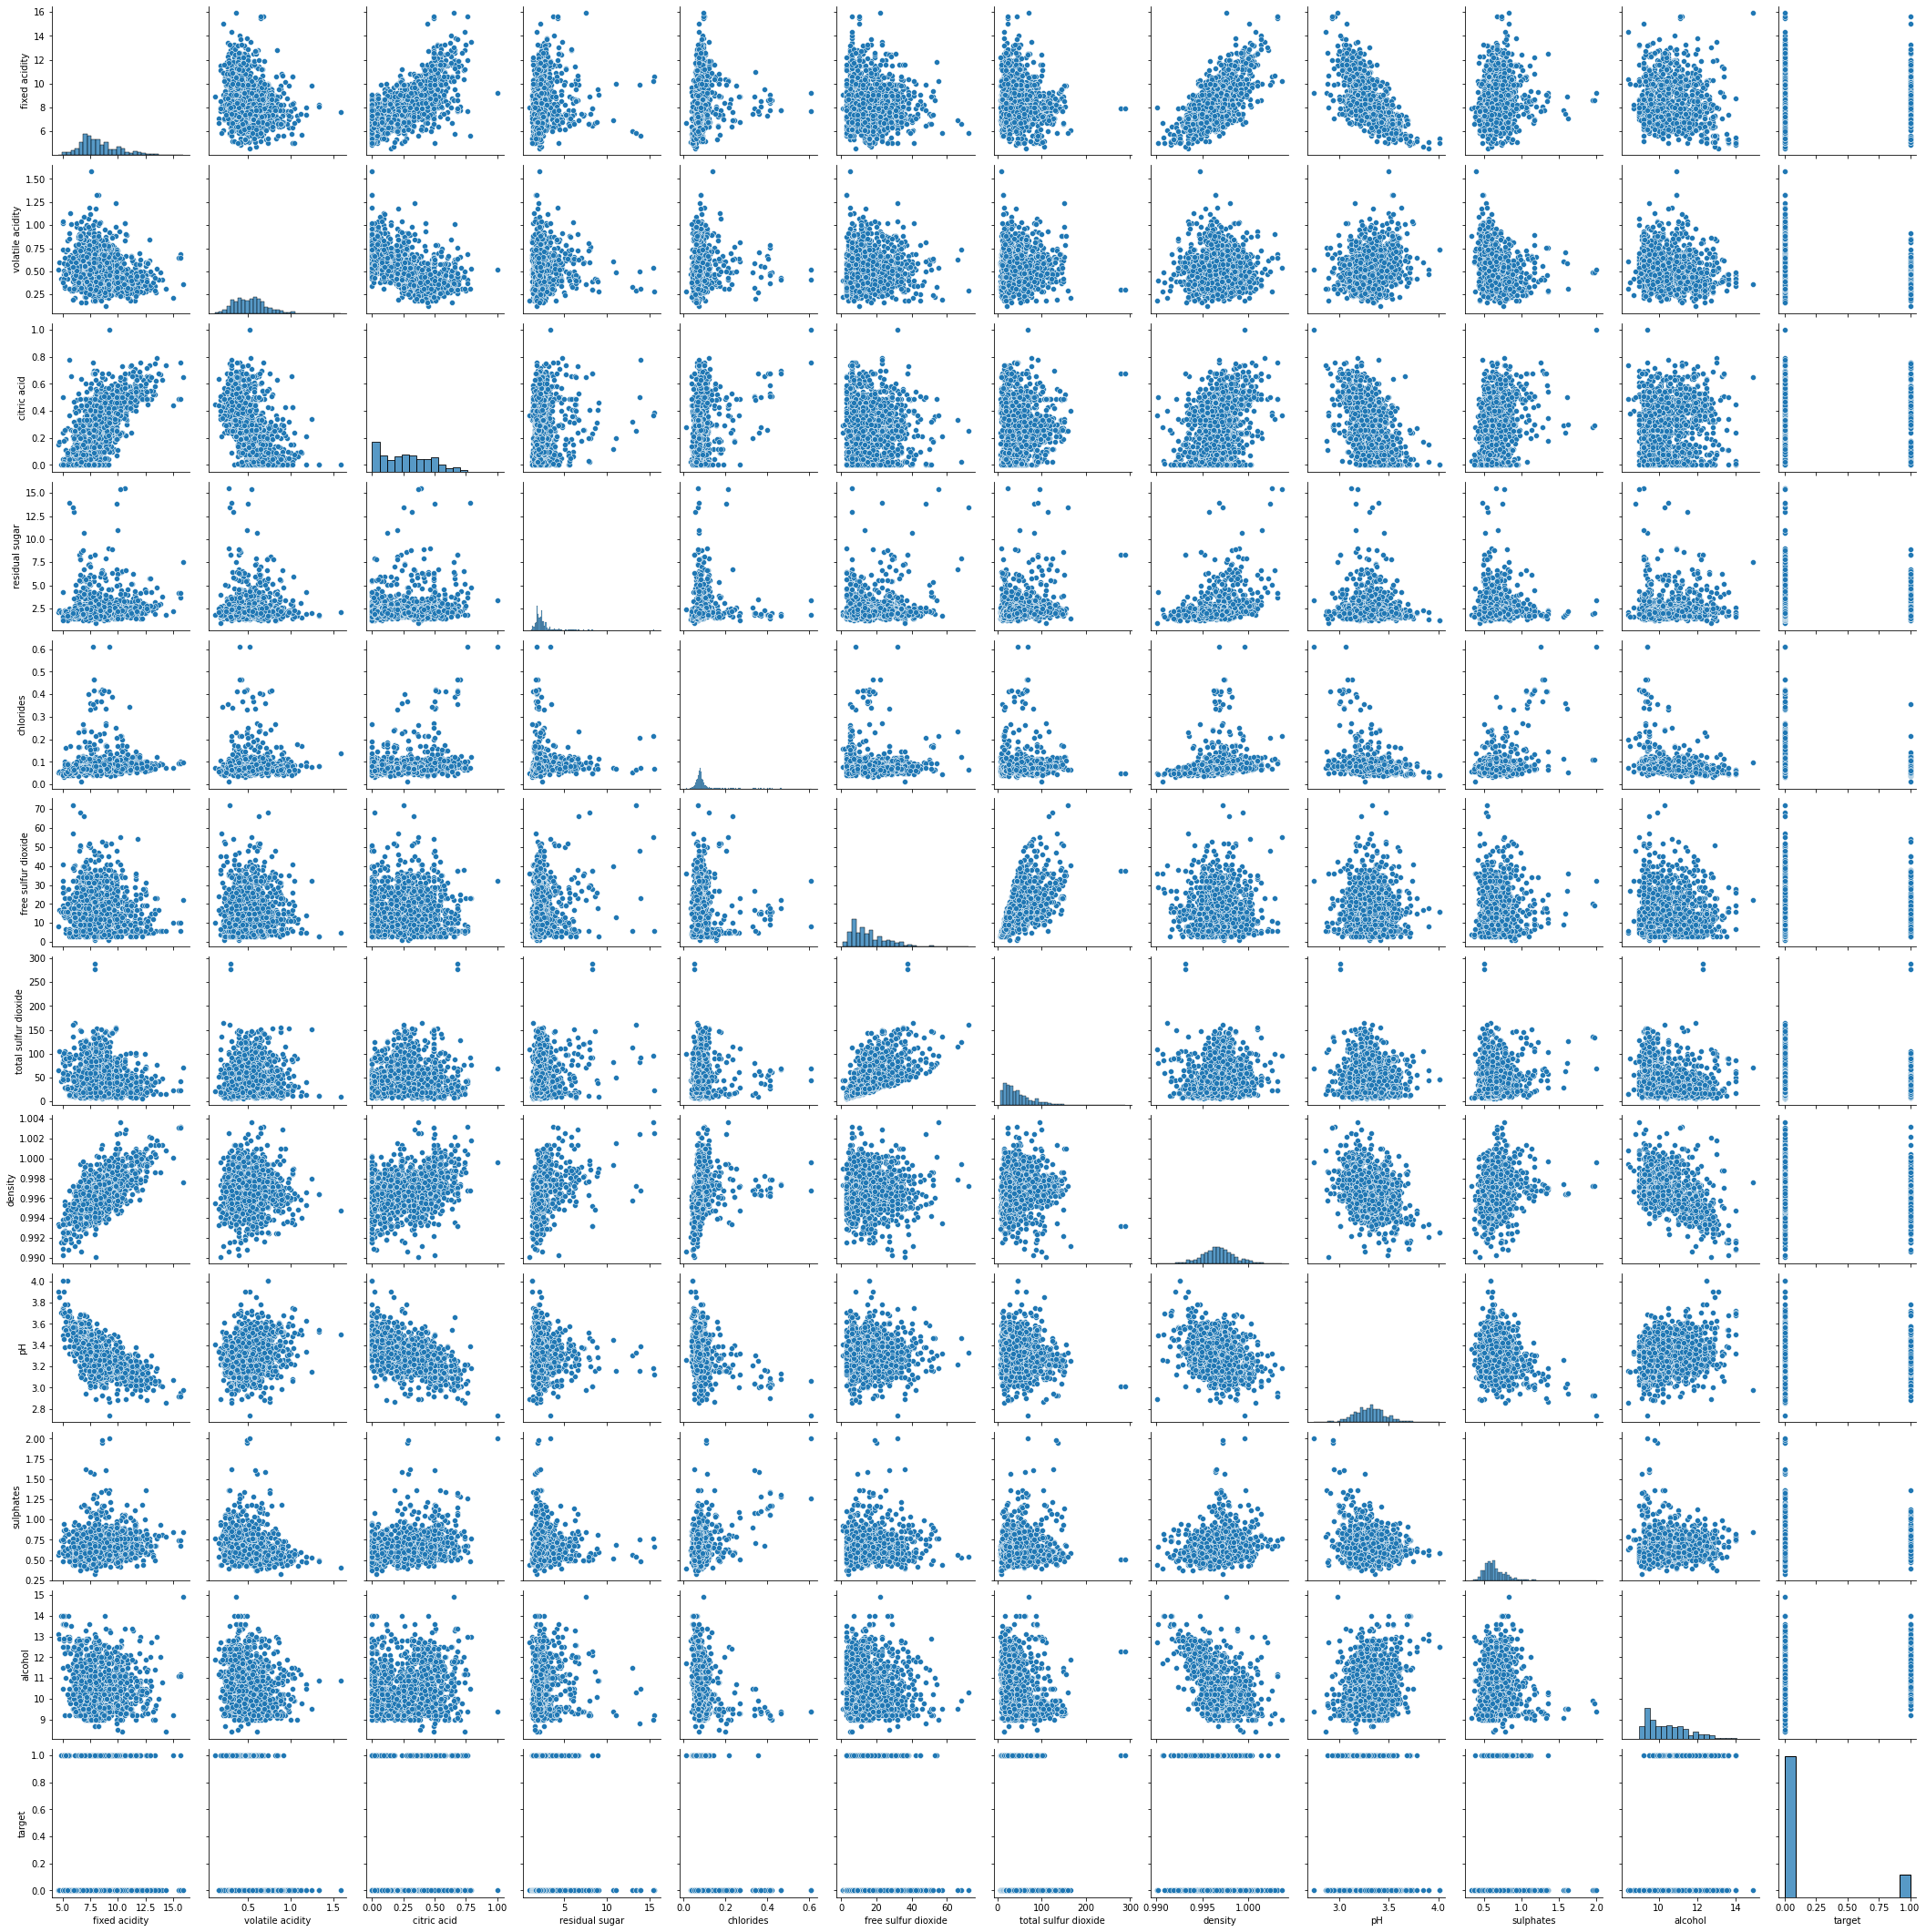

In [20]:
sns.pairplot(df)

# Correlation

In [21]:
#lets find out the correlation between the columns
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,target
fixed acidity,1.000000,-0.255124,0.667437,0.111025,0.085886,-0.140580,-0.103777,0.670195,-0.686685,0.190269,-0.061596,0.116120
volatile acidity,-0.255124,1.000000,-0.551248,-0.002449,0.055154,-0.020945,0.071701,0.023943,0.247111,-0.256948,-0.197812,-0.267344
citric acid,0.667437,-0.551248,1.000000,0.143892,0.210195,-0.048004,0.047358,0.357962,-0.550310,0.326062,0.105108,0.203561
residual sugar,0.111025,-0.002449,0.143892,1.000000,0.026656,0.160527,0.201038,0.324522,-0.083143,-0.011837,0.063281,0.052811
chlorides,0.085886,0.055154,0.210195,0.026656,1.000000,0.000749,0.045773,0.193592,-0.270893,0.394557,-0.223824,-0.096806
free sulfur dioxide,-0.140580,-0.020945,-0.048004,0.160527,0.000749,1.000000,0.667246,-0.018071,0.056631,0.054126,-0.080125,-0.072771
total sulfur dioxide,-0.103777,0.071701,0.047358,0.201038,0.045773,0.667246,1.000000,0.078141,-0.079257,0.035291,-0.217829,-0.135877
density,0.670195,0.023943,0.357962,0.324522,0.193592,-0.018071,0.078141,1.000000,-0.355617,0.146036,-0.504995,-0.158052
pH,-0.686685,0.247111,-0.550310,-0.083143,-0.270893,0.056631,-0.079257,-0.355617,1.000000,-0.214134,0.213418,-0.054131
sulphates,0.190269,-0.256948,0.326062,-0.011837,0.394557,0.054126,0.035291,0.146036,-0.214134,1.000000,0.091621,0.201551


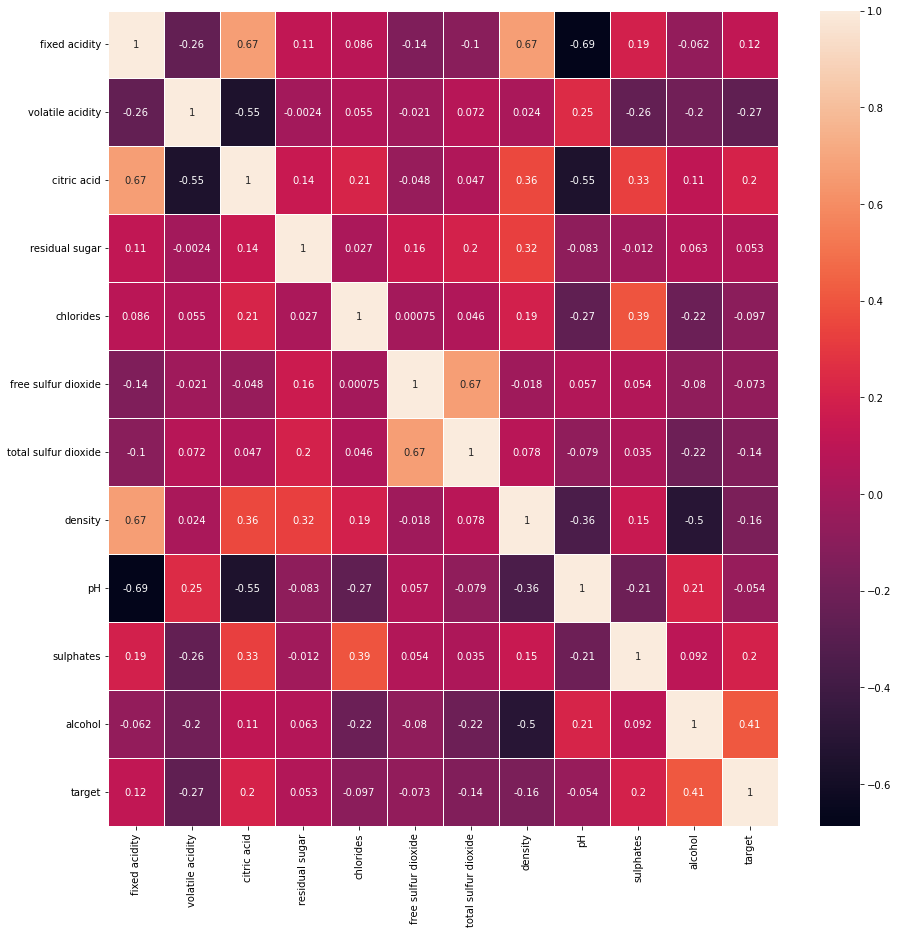

In [22]:
#lets plot the correlation
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True,linewidth=1)
plt.show()

Observation - We can see some correaltion between free sulphur dioxide and total sulphur dioxide, which may cause multicolinearity issue. lets findout the the bond strenght of the feature columns with target 

In [23]:
#lets find out the correlation of Feature variables with target variable 
df.corr()['target'].sort_values()

volatile acidity       -0.267344
density                -0.158052
total sulfur dioxide   -0.135877
chlorides              -0.096806
free sulfur dioxide    -0.072771
pH                     -0.054131
residual sugar          0.052811
fixed acidity           0.116120
sulphates               0.201551
citric acid             0.203561
alcohol                 0.409926
target                  1.000000
Name: target, dtype: float64

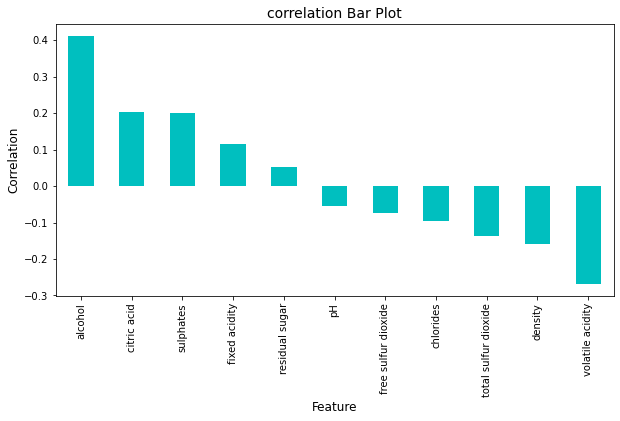

In [24]:
#Plotting the correlation
plt.figure(figsize=(10,5))
df.corr()['target'].sort_values(ascending=False).drop(['target']).plot(kind='bar' ,color='c')
plt.xlabel('Feature' ,fontsize=12)
plt.ylabel('Correlation',fontsize=12)
plt.title('correlation Bar Plot',fontsize=14)
plt.show()

Observation- 
- Alcohol has a 41% correlation with wine quality which is a strong bond
- citric acid and sulphates have good bond with wine quality
- fixed acidity and residual sugar have weak bond
- alcohol, citric acid, sulphates, fixed acidity and residual sugar have +ve correlation with wine quality
- pH, sulphar dioxide have weak -ve correlation with wine quality
- density and volatile acidity have good negative correlation with wine quality

# Detecting Multicollinearity with VIF and Data Cleaning

Observed using heatmap that some of the feature variable have good correaltion which causes multicollinearity. lets test that using VIF score 

In [25]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# VIF dataframe
vif_data = pd.DataFrame()

vif_data["feature"] = df.columns
vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(len(df.columns))]
print(vif_data)

                 feature          VIF
0          fixed acidity    75.028106
1       volatile acidity    16.626789
2            citric acid     9.190584
3         residual sugar     4.924858
4              chlorides     6.401949
5    free sulfur dioxide     6.434059
6   total sulfur dioxide     6.554458
7                density  1503.701569
8                     pH  1098.788569
9              sulphates    22.464245
10               alcohol   137.996295
11                target     1.513375


VIF values ranging between 1 and 10 are moderate. They represent a medium level of collinearity. Values of more than 10 are highly collinear.

Observation-

As VIF score for density is quite high, Lets drop that column and check VIF again

In [26]:
# VIF dataframe
vif_data1 = pd.DataFrame()

df.drop(['density'],axis=1, inplace=True)

vif_data1["feature"] = df.columns
vif_data1["VIF"] = [variance_inflation_factor(df.values, i) for i in range(len(df.columns))]
print(vif_data1)

                 feature         VIF
0          fixed acidity   39.831966
1       volatile acidity   16.608115
2            citric acid    9.154268
3         residual sugar    4.924858
4              chlorides    5.862951
5    free sulfur dioxide    6.378124
6   total sulfur dioxide    6.113354
7                     pH  166.608624
8              sulphates   22.407688
9                alcohol  135.605636
10                target    1.510040


Observation - VIF score has reduced a lot, but need to reduce further, as pH is also having high VIF score, lets drop that too

In [27]:
# VIF dataframe
vif_data2 = pd.DataFrame()

df.drop(['pH'],axis=1, inplace=True)

vif_data2["feature"] = df.columns
vif_data2["VIF"] = [variance_inflation_factor(df.values, i) for i in range(len(df.columns))]
print(vif_data2)

                feature        VIF
0         fixed acidity  37.403642
1      volatile acidity  15.549407
2           citric acid   8.671410
3        residual sugar   4.923992
4             chlorides   5.814141
5   free sulfur dioxide   6.348410
6  total sulfur dioxide   6.020658
7             sulphates  21.932001
8               alcohol  38.838024
9                target   1.418095


Observation - Lets drop Fixed Acidity to Reduce VIF more

In [28]:
# VIF dataframe
vif_data2 = pd.DataFrame()

df.drop(['fixed acidity'],axis=1, inplace=True)

vif_data2["feature"] = df.columns
vif_data2["VIF"] = [variance_inflation_factor(df.values, i) for i in range(len(df.columns))]
print(vif_data2)

                feature        VIF
0      volatile acidity  13.125594
1           citric acid   4.947786
2        residual sugar   4.898964
3             chlorides   5.758039
4   free sulfur dioxide   6.336922
5  total sulfur dioxide   5.923338
6             sulphates  21.270507
7               alcohol  33.036122
8                target   1.403946


# Feature Selection

Statistical tests can be used to select those features that have the strongest relationship with the output variables.
The scikit-learn library provides the SelectKBest with f_classif() class that can be used with a suite of different statistical tests to select a specific number of features.

In [29]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
x = df.drop('target', axis=1)
y = df['target']
best_feature = SelectKBest(score_func=f_classif, k=8)
fit = best_feature.fit(x, y)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)

# concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Specs', 'Score']  #naming the dataframe column

featureScores.sort_values(by=['Score'], ascending=False)

,Specs,Score
7,alcohol,274.086403
0,volatile acidity,104.454520
1,citric acid,58.660865
6,sulphates,57.459267
5,total sulfur dioxide,25.525127
3,chlorides,12.837335
4,free sulfur dioxide,7.224343
2,residual sugar,3.795191


Observation - From the above table we can see that which column is important to our target variable. So we will select top 7 columns from the dataset.

In [30]:
df.drop(['residual sugar'], axis=1, inplace=True)

In [31]:
df

,volatile acidity,citric acid,chlorides,free sulfur dioxide,total sulfur dioxide,sulphates,alcohol,target
0,0.700,0.00,0.076,11.0,34.0,0.56,9.4,0
1,0.880,0.00,0.098,25.0,67.0,0.68,9.8,0
2,0.760,0.04,0.092,15.0,54.0,0.65,9.8,0
3,0.280,0.56,0.075,17.0,60.0,0.58,9.8,0
5,0.660,0.00,0.075,13.0,40.0,0.56,9.4,0
...,...,...,...,...,...,...,...,...
1593,0.620,0.08,0.068,28.0,38.0,0.82,9.5,0
1594,0.600,0.08,0.090,32.0,44.0,0.58,10.5,0
1595,0.550,0.10,0.062,39.0,51.0,0.76,11.2,0
1597,0.645,0.12,0.075,32.0,44.0,0.71,10.2,0


So we had selected the best features of the data set to move further

# Skewness

In [32]:
df.skew()

volatile acidity        0.729279
citric acid             0.312726
chlorides               5.502487
free sulfur dioxide     1.226579
total sulfur dioxide    1.540368
sulphates               2.406505
alcohol                 0.859841
target                  2.133662
dtype: float64

Observation-

- The acceptable skewness range is +/- 0.5, chlorides, sulphates, target have high skewness while volatile acidity, free sulphur dioxide, total sulphur dioxide, alcohol  have little skewness involved.

# Distribution Curve

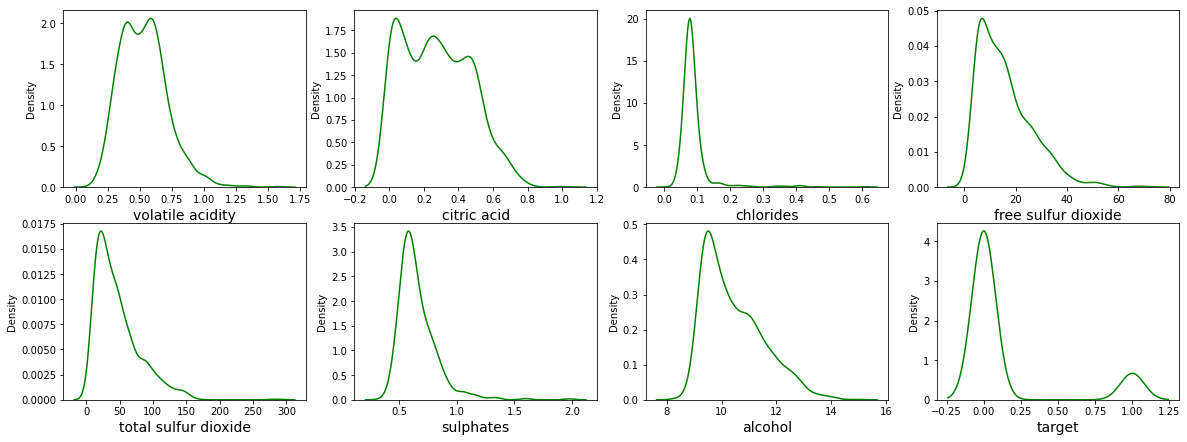

In [33]:
plt.figure(figsize=(20,15),facecolor='white')
plotnum=1
for col in df.columns:
    if plotnum<=8:
        plt.subplot(4,4,plotnum)
        sns.kdeplot(df[col], color = 'g')
        plt.xlabel(col,fontsize=14)
    plotnum+=1
plt.show()

Observation - There is considerable amount of skewness in all feature variables and target. we need to treat it but first of all we need to check outliers and remove that

# Checking Outliers

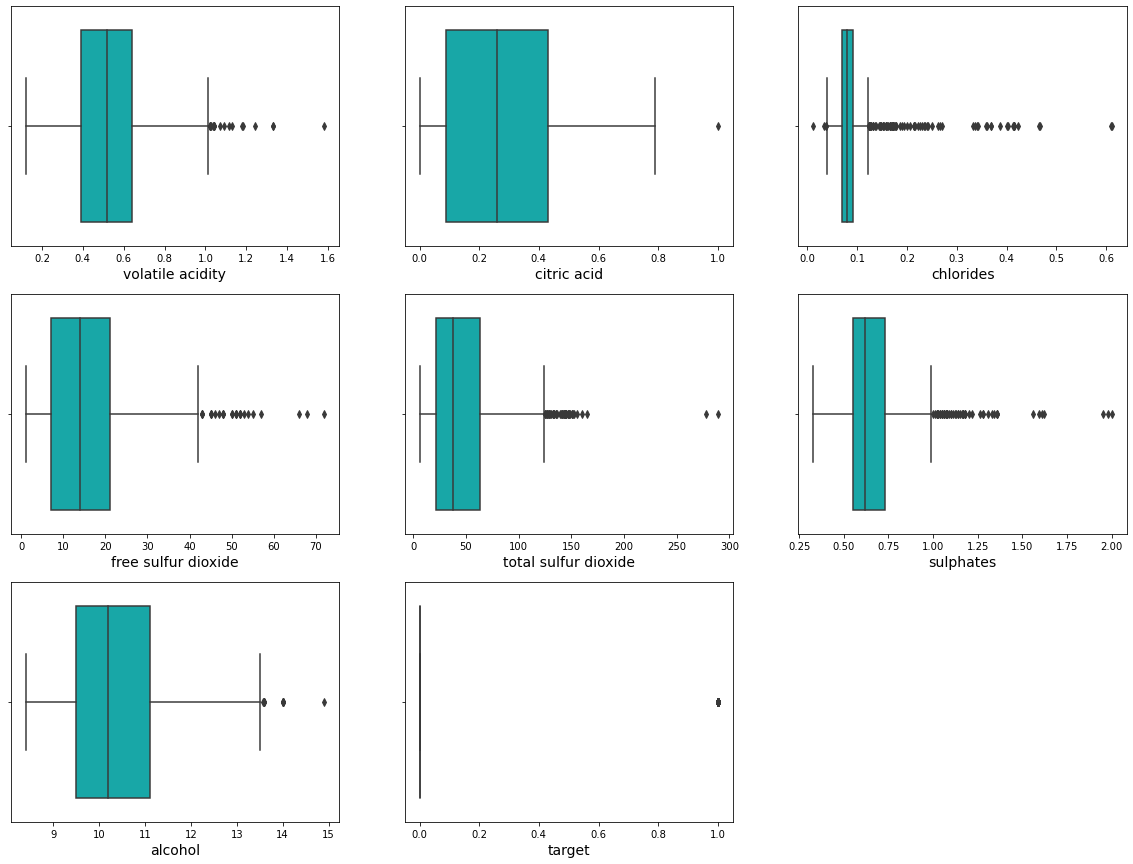

In [34]:
plt.figure(figsize=(20,15),facecolor='white')
plotnum=1
for col in df.columns:
    if plotnum<=8:
        plt.subplot(3,3,plotnum)
        sns.boxplot(df[col], color='c')
        plt.xlabel(col,fontsize=14)
    plotnum+=1
plt.show()

Observation - as expected all the feature variables and target variable have outliers. lets treat them with the help of z score method

# Removing Outliers

In [35]:
#using z-score method
from scipy.stats import zscore #import zscore from scipy library
zscore(df)

,volatile acidity,citric acid,chlorides,free sulfur dioxide,total sulfur dioxide,sulphates,alcohol,target
0,0.932000,-1.393258,-0.245623,-0.468554,-0.384050,-0.578561,-0.954374,-0.395722
1,1.915800,-1.393258,0.200094,0.872003,0.604073,0.124822,-0.584575,-0.395722
2,1.259934,-1.188617,0.078535,-0.085537,0.214813,-0.051024,-0.584575,-0.395722
3,-1.363534,1.471711,-0.265883,0.105971,0.394471,-0.461331,-0.584575,-0.395722
5,0.713378,-1.393258,-0.265883,-0.277045,-0.204391,-0.578561,-0.954374,-0.395722
...,...,...,...,...,...,...,...,...
1593,0.494756,-0.983977,-0.407702,1.159265,-0.264277,0.945435,-0.861924,-0.395722
1594,0.385444,-0.983977,0.038015,1.542281,-0.084619,-0.461331,0.062574,-0.395722
1595,0.112167,-0.881656,-0.529261,2.212559,0.124983,0.593744,0.709723,-0.395722
1597,0.631395,-0.779336,-0.265883,1.542281,-0.084619,0.300667,-0.214775,-0.395722


In [36]:
z = np.abs(zscore(df))
z.shape

(1359, 8)

In [37]:
np.where(z>3) #detecting outliers where z>3

(array([  11,   12,   13,   13,   15,   15,   17,   35,   38,   39,   53,
          75,   75,   77,   80,   82,   85,   96,   96,   99,  114,  115,
         127,  135,  135,  135,  150,  150,  159,  176,  202,  202,  211,
         226,  226,  245,  252,  295,  296,  309,  346,  393,  408,  448,
         492,  506,  510,  513,  534,  555,  562,  564,  565,  582,  582,
         592,  597,  599,  626,  627,  632,  652,  671,  672,  687,  710,
         791,  792,  838,  895,  895,  918,  920,  963,  985,  994, 1003,
        1049, 1060, 1060, 1073, 1081, 1082, 1103, 1106, 1117, 1123, 1123,
        1151, 1159, 1162, 1165, 1216, 1250, 1325], dtype=int64),
 array([5, 3, 3, 4, 2, 5, 2, 0, 2, 5, 3, 2, 5, 2, 5, 5, 5, 2, 5, 4, 0, 0,
        6, 1, 2, 5, 2, 5, 2, 0, 2, 5, 2, 2, 5, 2, 2, 5, 5, 4, 3, 2, 6, 4,
        2, 3, 6, 4, 5, 5, 4, 4, 6, 0, 4, 4, 0, 2, 5, 0, 2, 2, 2, 2, 5, 6,
        3, 3, 3, 2, 5, 4, 4, 3, 3, 2, 3, 3, 3, 4, 2, 6, 6, 3, 0, 0, 2, 5,
        3, 5, 2, 2, 3, 3, 3], dtype=int64))

In [38]:
z.iloc[13] #checking one of the detected outliers

volatile acidity        0.494756
citric acid             0.421215
chlorides               1.658804
free sulfur dioxide     3.361607
total sulfur dioxide    3.029466
sulphates               1.590203
alcohol                 1.139274
target                  0.395722
Name: 15, dtype: float64

In [39]:
#checking total number of rows where z>3
len(np.where(z>3)[0])

95

In [40]:
#removing outliers

df_new = df[(z<3).all(axis=1)]

print("Old Data Frame:",df.shape)
print("New Data Frame:",df_new.shape)
print("Total Dropped Rows:",df.shape[0] - df_new.shape[0])

Old Data Frame: (1359, 8)
New Data Frame: (1277, 8)
Total Dropped Rows: 82


In [41]:
#percent loss
percent_loss = 82*100/1359
print("Percent Loss: ",percent_loss)

Percent Loss:  6.0338484179543785


There is a total 6% data loss which is acceptable.

In [42]:
df_new

,volatile acidity,citric acid,chlorides,free sulfur dioxide,total sulfur dioxide,sulphates,alcohol,target
0,0.700,0.00,0.076,11.0,34.0,0.56,9.4,0
1,0.880,0.00,0.098,25.0,67.0,0.68,9.8,0
2,0.760,0.04,0.092,15.0,54.0,0.65,9.8,0
3,0.280,0.56,0.075,17.0,60.0,0.58,9.8,0
5,0.660,0.00,0.075,13.0,40.0,0.56,9.4,0
...,...,...,...,...,...,...,...,...
1593,0.620,0.08,0.068,28.0,38.0,0.82,9.5,0
1594,0.600,0.08,0.090,32.0,44.0,0.58,10.5,0
1595,0.550,0.10,0.062,39.0,51.0,0.76,11.2,0
1597,0.645,0.12,0.075,32.0,44.0,0.71,10.2,0


# Checking Outliers again using boxplot

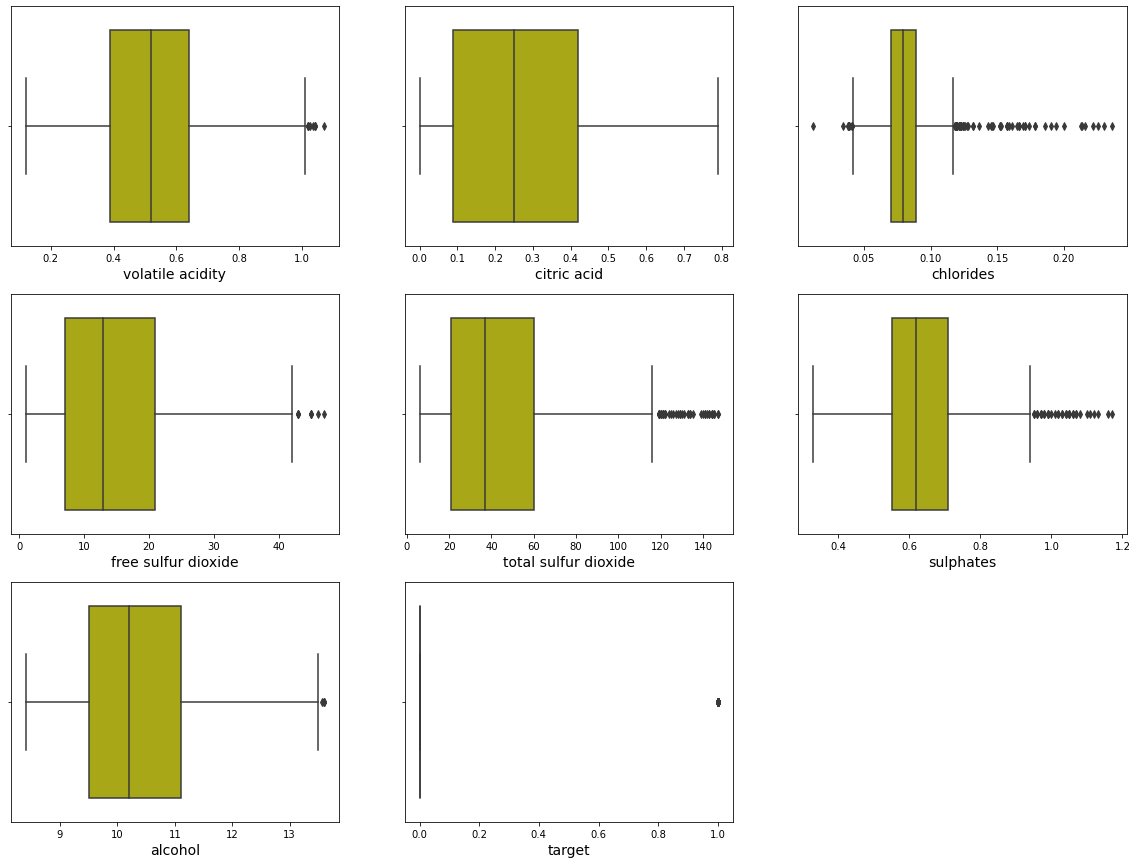

In [43]:
plt.figure(figsize=(20,15),facecolor='white')
plotnum=1
for col in df_new.columns:
    if plotnum<=8:
        plt.subplot(3,3,plotnum)
        sns.boxplot(df_new[col], color='y')
        plt.xlabel(col,fontsize=14)
    plotnum+=1
plt.show()

Observation - outliers have been treated to some extent. Lets implement IQR method to treat outliers

# Treating Outliers using IQR method

In [44]:
X = df_new.drop('target', axis=1)
Y = df_new['target']

In [45]:
#create new dataframe
X_new = pd.DataFrame()
X_new

""


In [46]:
def detect_and_treat_outliers_iqr(data):
    new_list = []
    #data = sorted(data)
    
    median = np.median(data)# calculating median

    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)

    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            i = median    #replacing outlier with median
        new_list.append(i)
    return new_list 


for col in X.columns:
    X_new[col] = detect_and_treat_outliers_iqr(X[col])
    
X_new      

,volatile acidity,citric acid,chlorides,free sulfur dioxide,total sulfur dioxide,sulphates,alcohol
0,0.700,0.00,0.076,11.0,34.0,0.56,9.4
1,0.880,0.00,0.098,25.0,67.0,0.68,9.8
2,0.760,0.04,0.092,15.0,54.0,0.65,9.8
3,0.280,0.56,0.075,17.0,60.0,0.58,9.8
4,0.660,0.00,0.075,13.0,40.0,0.56,9.4
...,...,...,...,...,...,...,...
1272,0.620,0.08,0.068,28.0,38.0,0.82,9.5
1273,0.600,0.08,0.090,32.0,44.0,0.58,10.5
1274,0.550,0.10,0.062,39.0,51.0,0.76,11.2
1275,0.645,0.12,0.075,32.0,44.0,0.71,10.2


In the above method we detected the Outliers using IQR method and replaced them with median

# Ploting Boxplot

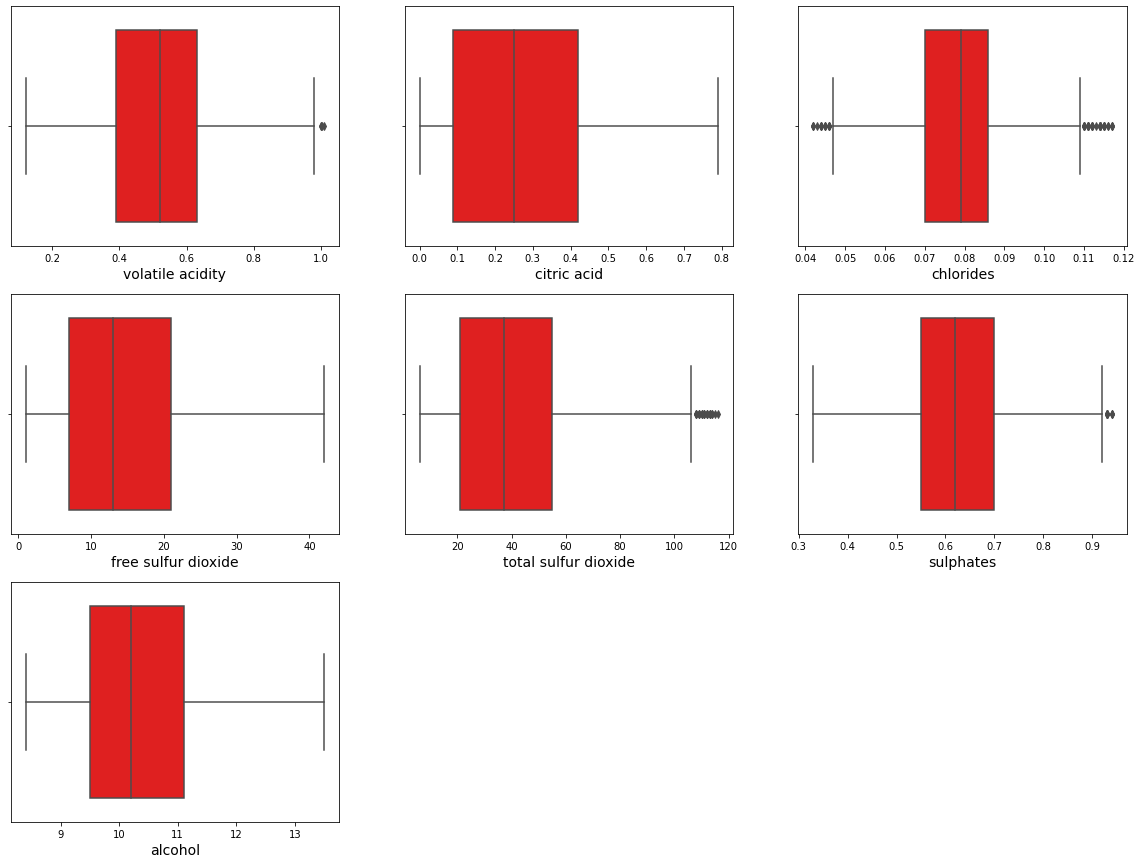

In [47]:
plt.figure(figsize=(20,15),facecolor='white')
plotnum=1
for col in X.columns:
    if plotnum<=8:
        plt.subplot(3,3,plotnum)
        sns.boxplot(X_new[col], color='r')
        plt.xlabel(col,fontsize=14)
    plotnum+=1
plt.show()

Observation - Outliers can be treated to a good extent. we can further transform data using Power transform to Treat skewness

# Balancing Target Variable

In [48]:
Y.value_counts()

0    1102
1     175
Name: target, dtype: int64

<AxesSubplot:xlabel='target', ylabel='count'>

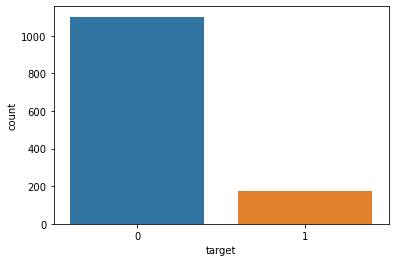

In [49]:
sns.countplot(Y)

In [50]:
from imblearn.over_sampling import SMOTE
smt = SMOTE()
X,Y = smt.fit_resample(X_new,Y,)
X,Y

(      volatile acidity  citric acid  chlorides  free sulfur dioxide  \
 0             0.700000     0.000000   0.076000            11.000000   
 1             0.880000     0.000000   0.098000            25.000000   
 2             0.760000     0.040000   0.092000            15.000000   
 3             0.280000     0.560000   0.075000            17.000000   
 4             0.660000     0.000000   0.075000            13.000000   
 ...                ...          ...        ...                  ...   
 2199          0.418464     0.452030   0.068172             8.552097   
 2200          0.476079     0.593138   0.075118             6.000000   
 2201          0.259447     0.403518   0.067032            10.000000   
 2202          0.385825     0.487128   0.081165            11.386967   
 2203          0.475494     0.079312   0.088219            10.000000   
 
       total sulfur dioxide  sulphates    alcohol  
 0                34.000000   0.560000   9.400000  
 1                67.000000   

In [51]:
X.shape

(2204, 7)

In [52]:
Y.shape

(2204,)

In [53]:
Y

0       0
1       0
2       0
3       0
4       0
       ..
2199    1
2200    1
2201    1
2202    1
2203    1
Name: target, Length: 2204, dtype: int32

<AxesSubplot:xlabel='target', ylabel='count'>

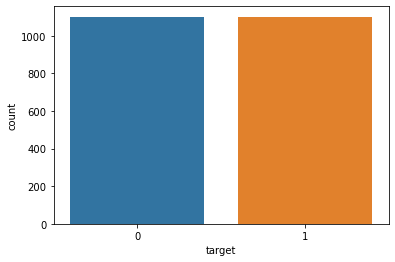

In [54]:
sns.countplot(Y)

Target data has been balanced using SMOTE

# Transforming data to remove skewness further (Power Transform)

In [55]:
from sklearn.preprocessing import power_transform

X = power_transform(X, method='yeo-johnson')
type(X)

numpy.ndarray

In [56]:
X

array([[ 1.37284891, -1.67903676, -0.01789425, ...,  0.18260684,
        -0.96670919, -1.40868694],
       [ 2.02747275, -1.67903676,  1.48733431, ...,  1.22670933,
         0.12362782, -0.99569351],
       [ 1.61402501, -1.47079913,  1.09182757, ...,  0.8949811 ,
        -0.14383595, -0.99569351],
       ...,
       [-1.62396612,  0.45880662, -0.67700198, ..., -0.65721796,
         0.64960499,  1.05053975],
       [-0.46029204,  0.91103705,  0.34935717, ..., -0.32825781,
         0.34519727,  0.97780769],
       [ 0.18669239, -1.26528557,  0.83694048, ..., -0.79018516,
         0.13693205,  0.38226663]])

In [57]:
X.ndim

2

In [58]:
X.mean()

-1.3816620477575192e-16

In [59]:
X.std()

1.0

mean = 0 and Standard deviation = 1, our feature variable are normalized now

In [60]:
X.shape

(2204, 7)

# Feature Scaling using Standard Scaler

In [61]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X = pd.DataFrame(sc.fit_transform(X))
X

,0,1,2,3,4,5,6
0,1.372849,-1.679037,-0.017894,-0.094947,0.182607,-0.966709,-1.408687
1,2.027473,-1.679037,1.487334,1.226208,1.226709,0.123628,-0.995694
2,1.614025,-1.470799,1.091828,0.396141,0.894981,-0.143836,-0.995694
3,-1.410420,1.307475,-0.090025,0.597365,1.057077,-0.781100,-0.995694
4,1.196966,-1.679037,-0.090025,0.168126,0.432872,-0.966709,-1.408687
...,...,...,...,...,...,...,...
2199,-0.210210,0.720850,-0.591657,-0.484001,-0.096343,0.512649,-0.115637
2200,0.190522,1.488433,-0.081517,-1.013520,-1.150927,0.648922,0.692834
2201,-1.623966,0.458807,-0.677002,-0.243368,-0.657218,0.649605,1.050540
2202,-0.460292,0.911037,0.349357,-0.040796,-0.328258,0.345197,0.977808


In [62]:
X.shape

(2204, 7)

# Model Building

I will train the follwoing models - 
- A. Logistic Regression
- B. Decision Trees
- C. Random Forests
- D. SVC linear kernel
- E. SGD Classifier
- F. KNN (K_nearest_neighbors)
- G. AdaBoost Classifier
- H. Gradiant Boost Classifier
- I. Bagging Classifier

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,f1_score,roc_curve
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

# Finding best Random State

In [69]:
#Choosing the best random state for our ML Model
maxAccu = 0
maxRS = 0
for i in range(1,200):
    x_train, x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.20,random_state = i)
    lr = LogisticRegression()
    lr.fit(x_train, y_train)
    
    pred_train = lr.predict(x_train)
    pred_test = lr.predict(x_test)
    
    acc_train = accuracy_score(y_train,pred_train)
    acc_test = accuracy_score(y_test,pred_test)
    
    if acc_test > maxAccu:
        maxAccu = acc_test
        maxRS = i
print('training accuracy :',acc_train,'test accuracy is :',acc_test,'random_state is:',i)

training accuracy : 0.8128190584231424 test accuracy is : 0.8163265306122449 random_state is: 199


So Logistic regression is showing best accuracy score at 199 random stage

# Creating the Training and Testing data set

In [109]:
x_train,x_test,y_train,y_test= train_test_split(X,Y,random_state=199, test_size=0.20)

#creating models empty dataframe
models_df = pd.DataFrame() 

# Machine Learning Model

In [110]:
def reg_func(model, X, Y, model_name,sc):    
    model.fit(x_train,y_train)
    pred = model.predict(x_test)
    
    #classification report
    print('Classification Report :\n',classification_report(y_test,pred))
    
    #confusion matrix
    conf = confusion_matrix(y_test, pred)
    tp = conf[0,0]
    fp = conf[0,1]
    tn = conf[1,1]
    fn = conf[1,0]
    sns.heatmap(conf, annot=True)
    
    #accracy score
    acs = accuracy_score(y_test,pred)
    print('Accuracy :',acs)
    
    #cross validation score
    cvs = cross_val_score(model,X,Y,cv=4).mean()
    print('Cross validation score :',cvs)
    
    #difference in accuracy and cross validation score
    diff = abs(acs - cvs)
    print('Accuracy and CV Score Diff :', diff)
    
    #ROC Score
    rocs = roc_auc_score(y_test,pred)
    print("ROC AUC Score :", rocs)
    
    #ROC AUC curve
    fpr,tpr,threshold = roc_curve(y_test, model.predict(x_test))
    plt.figure(figsize=(5,5),facecolor='white')    
    plt.plot(fpr,tpr,label=model_name)
    plt.legend()
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.title("Receiver Operating Characteristic")
    plt.show()
    
    #appending data to dataframe
    models_df[sc] = [model_name, acs, cvs, diff, tp, fp, fn, tn, rocs,fpr,tpr]
        
    plt.figure(figsize=(5,5))
    plt.scatter(x=y_test, y=pred_test, color='r')
    plt.plot(y_test,y_test, color='b')
    plt.xlabel('Actual Wine Quality', fontsize = 14)
    plt.ylabel('Predicted Wine Quality', fontsize = 14)
    plt.show()

# Logistic Regression

Classification Report :
               precision    recall  f1-score   support

           0       0.82      0.81      0.81       216
           1       0.82      0.83      0.82       225

    accuracy                           0.82       441
   macro avg       0.82      0.82      0.82       441
weighted avg       0.82      0.82      0.82       441

Accuracy : 0.81859410430839
Cross validation score : 0.8017241379310345
Accuracy and CV Score Diff : 0.016869966377355494
ROC AUC Score : 0.8184259259259259


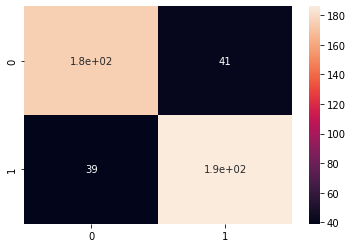

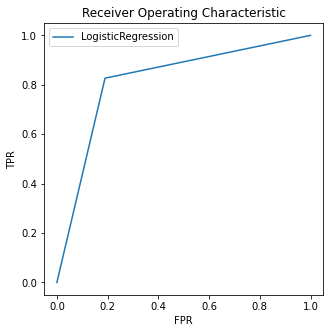

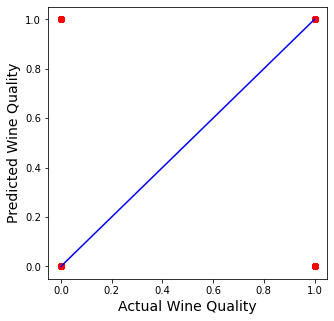

In [111]:
reg_func(LogisticRegression(solver='lbfgs', penalty='none', max_iter=10000, random_state=2),X,Y, 'LogisticRegression','lr')

# Decision Tree Classifier

Classification Report :
               precision    recall  f1-score   support

           0       0.89      0.88      0.88       216
           1       0.89      0.89      0.89       225

    accuracy                           0.89       441
   macro avg       0.89      0.89      0.89       441
weighted avg       0.89      0.89      0.89       441

Accuracy : 0.8866213151927438
Cross validation score : 0.8362068965517242
Accuracy and CV Score Diff : 0.05041441864101959
ROC AUC Score : 0.8864814814814814


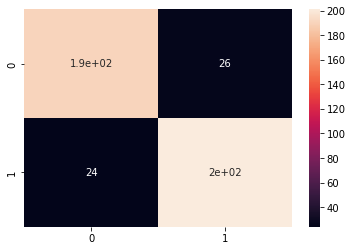

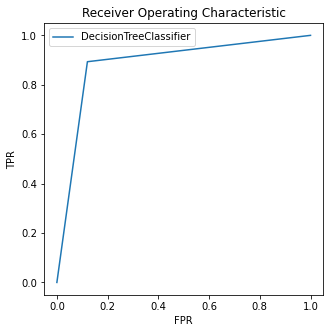

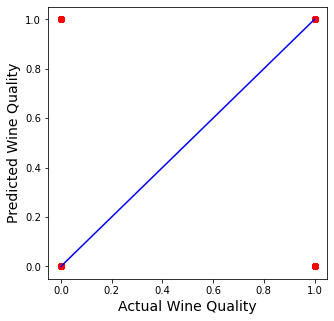

In [112]:
from sklearn.tree import DecisionTreeClassifier
reg_func(DecisionTreeClassifier(criterion = 'entropy'), X, Y, 'DecisionTreeClassifier','dtc')

# Random Forests

Classification Report :
               precision    recall  f1-score   support

           0       0.96      0.89      0.92       216
           1       0.90      0.96      0.93       225

    accuracy                           0.93       441
   macro avg       0.93      0.93      0.93       441
weighted avg       0.93      0.93      0.93       441

Accuracy : 0.927437641723356
Cross validation score : 0.8879310344827587
Accuracy and CV Score Diff : 0.03950660724059729
ROC AUC Score : 0.9267592592592592


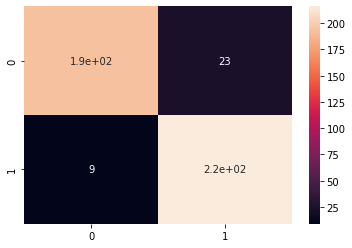

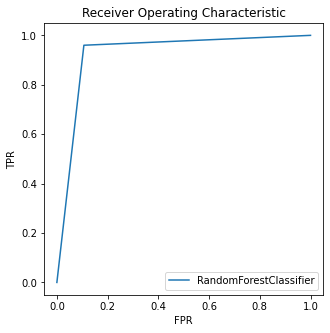

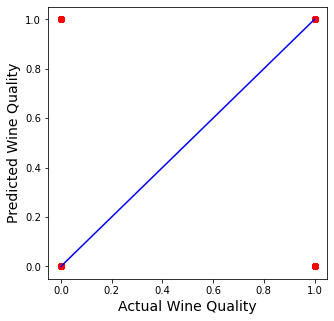

In [113]:
from sklearn.ensemble import RandomForestClassifier
reg_func(RandomForestClassifier(criterion = 'entropy'), X, Y,'RandomForestClassifier','rfc')

# SVM Classifier

Classification Report :
               precision    recall  f1-score   support

           0       0.86      0.80      0.83       216
           1       0.82      0.88      0.85       225

    accuracy                           0.84       441
   macro avg       0.84      0.84      0.84       441
weighted avg       0.84      0.84      0.84       441

Accuracy : 0.8390022675736961
Cross validation score : 0.8008166969147006
Accuracy and CV Score Diff : 0.03818557065899553
ROC AUC Score : 0.8381481481481481


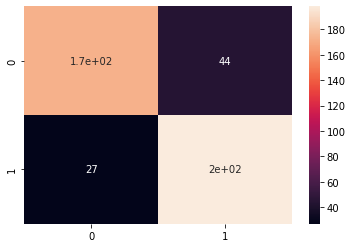

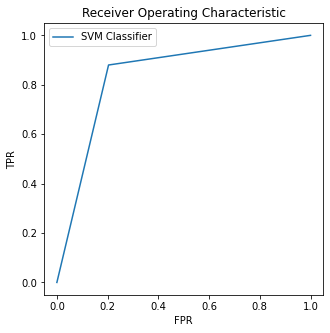

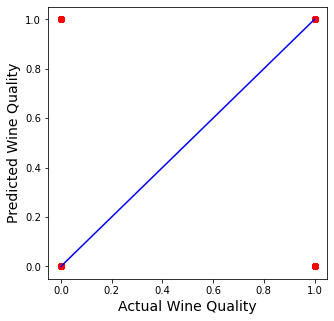

In [114]:
from sklearn.svm import SVC
reg_func(SVC(kernel='linear'),X,Y,'SVM Classifier','svmc')

# SGD Classifier

Classification Report :
               precision    recall  f1-score   support

           0       0.84      0.80      0.82       216
           1       0.81      0.86      0.84       225

    accuracy                           0.83       441
   macro avg       0.83      0.83      0.83       441
weighted avg       0.83      0.83      0.83       441

Accuracy : 0.8276643990929705
Cross validation score : 0.7921960072595282
Accuracy and CV Score Diff : 0.0354683918334423
ROC AUC Score : 0.827037037037037


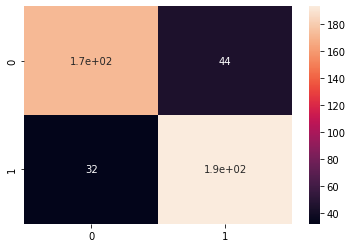

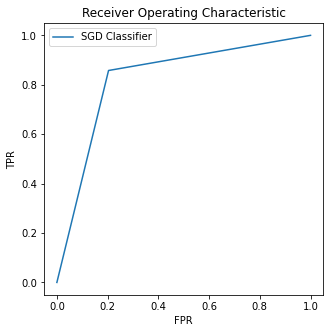

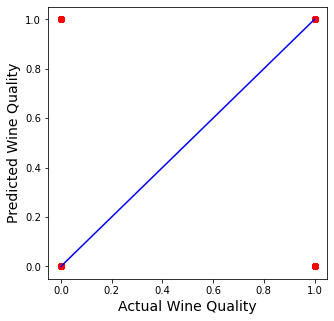

In [115]:
from sklearn.linear_model import SGDClassifier
reg_func(SGDClassifier(penalty=None),X,Y,'SGD Classifier','sgdc')

# KNN (k Nearest Neighbour)

Classification Report :
               precision    recall  f1-score   support

           0       0.96      0.85      0.90       216
           1       0.87      0.96      0.91       225

    accuracy                           0.91       441
   macro avg       0.91      0.91      0.91       441
weighted avg       0.91      0.91      0.91       441

Accuracy : 0.9070294784580499
Cross validation score : 0.853448275862069
Accuracy and CV Score Diff : 0.05358120259598098
ROC AUC Score : 0.9058333333333334


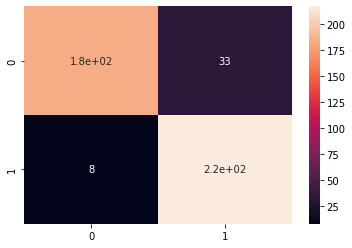

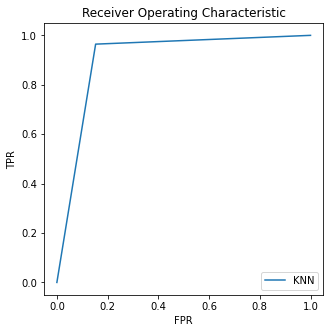

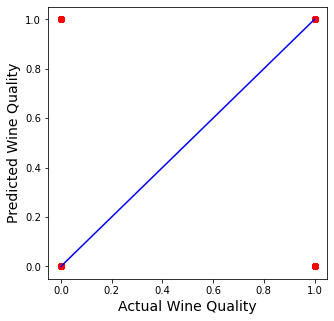

In [116]:
from sklearn.neighbors import KNeighborsClassifier
reg_func(KNeighborsClassifier(weights = 'distance'),X,Y,'KNN','knn')

# ADA Boost Classifier

Classification Report :
               precision    recall  f1-score   support

           0       0.89      0.86      0.87       216
           1       0.87      0.89      0.88       225

    accuracy                           0.88       441
   macro avg       0.88      0.87      0.88       441
weighted avg       0.88      0.88      0.88       441

Accuracy : 0.8752834467120182
Cross validation score : 0.8411978221415608
Accuracy and CV Score Diff : 0.034085624570457385
ROC AUC Score : 0.8749074074074074


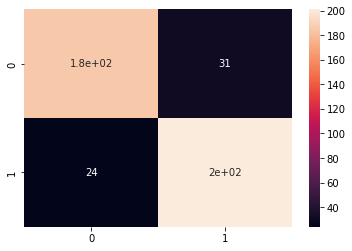

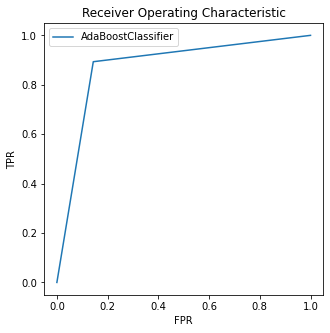

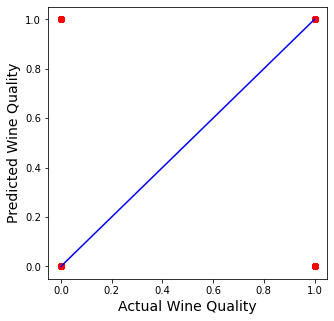

In [117]:
from sklearn.ensemble import AdaBoostClassifier
reg_func(AdaBoostClassifier(), X,Y,'AdaBoostClassifier','abc')

# Gradient Boost Classifier

Classification Report :
               precision    recall  f1-score   support

           0       0.91      0.88      0.89       216
           1       0.89      0.91      0.90       225

    accuracy                           0.90       441
   macro avg       0.90      0.90      0.90       441
weighted avg       0.90      0.90      0.90       441

Accuracy : 0.8979591836734694
Cross validation score : 0.8593466424682396
Accuracy and CV Score Diff : 0.03861254120522983
ROC AUC Score : 0.8976851851851853


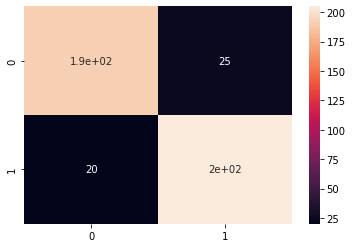

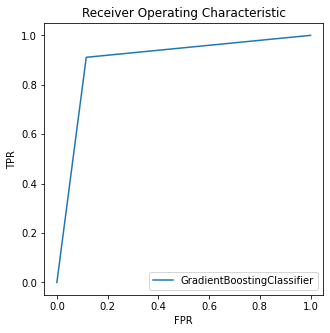

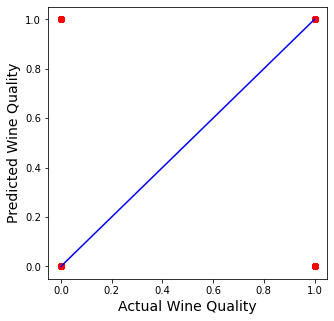

In [118]:
from sklearn.ensemble import GradientBoostingClassifier
reg_func(GradientBoostingClassifier(),X,Y,'GradientBoostingClassifier','gbc')

# Bagging Classifier

Classification Report :
               precision    recall  f1-score   support

           0       0.91      0.93      0.92       216
           1       0.93      0.91      0.92       225

    accuracy                           0.92       441
   macro avg       0.92      0.92      0.92       441
weighted avg       0.92      0.92      0.92       441

Accuracy : 0.9183673469387755
Cross validation score : 0.867967332123412
Accuracy and CV Score Diff : 0.05040001481536349
ROC AUC Score : 0.9186111111111112


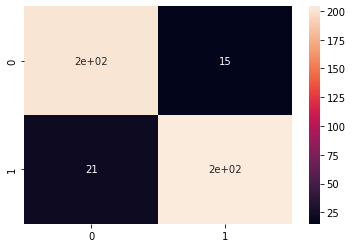

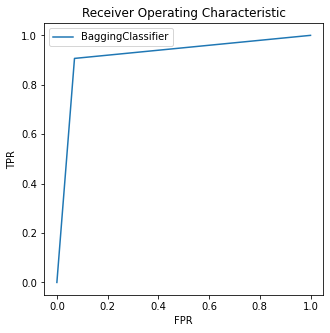

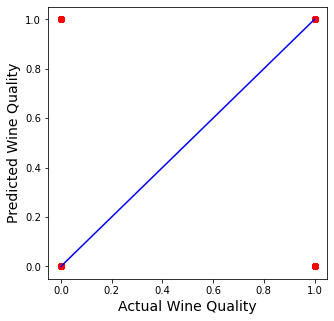

In [119]:
from sklearn.ensemble import BaggingClassifier

reg_func(BaggingClassifier(),X,Y,'BaggingClassifier','bc')

In [120]:
model_stats = models_df.transpose()
model_stats

,0,1,2,3,4,5,6,7,8,9,10
lr,LogisticRegression,0.818594,0.801724,0.01687,175,41,39,186,0.818426,"[0.0, 0.18981481481481483, 1.0]","[0.0, 0.8266666666666667, 1.0]"
dtc,DecisionTreeClassifier,0.886621,0.836207,0.050414,190,26,24,201,0.886481,"[0.0, 0.12037037037037036, 1.0]","[0.0, 0.8933333333333333, 1.0]"
rfc,RandomForestClassifier,0.927438,0.887931,0.039507,193,23,9,216,0.926759,"[0.0, 0.10648148148148148, 1.0]","[0.0, 0.96, 1.0]"
svmc,SVM Classifier,0.839002,0.800817,0.038186,172,44,27,198,0.838148,"[0.0, 0.2037037037037037, 1.0]","[0.0, 0.88, 1.0]"
sgdc,SGD Classifier,0.827664,0.792196,0.035468,172,44,32,193,0.827037,"[0.0, 0.2037037037037037, 1.0]","[0.0, 0.8577777777777778, 1.0]"
knn,KNN,0.907029,0.853448,0.053581,183,33,8,217,0.905833,"[0.0, 0.1527777777777778, 1.0]","[0.0, 0.9644444444444444, 1.0]"
abc,AdaBoostClassifier,0.875283,0.841198,0.034086,185,31,24,201,0.874907,"[0.0, 0.14351851851851852, 1.0]","[0.0, 0.8933333333333333, 1.0]"
gbc,GradientBoostingClassifier,0.897959,0.859347,0.038613,191,25,20,205,0.897685,"[0.0, 0.11574074074074074, 1.0]","[0.0, 0.9111111111111111, 1.0]"
bc,BaggingClassifier,0.918367,0.867967,0.0504,201,15,21,204,0.918611,"[0.0, 0.06944444444444445, 1.0]","[0.0, 0.9066666666666666, 1.0]"


In [121]:
model_stats.columns = ['Model','Accuracy Score', 'Cross Validation Score', 'Difference','True +ve', 'False +ve', 'False -ve', 'True -ve','ROC Score','FPR','TPR']
model_stats

,Model,Accuracy Score,Cross Validation Score,Difference,True +ve,False +ve,False -ve,True -ve,ROC Score,FPR,TPR
lr,LogisticRegression,0.818594,0.801724,0.01687,175,41,39,186,0.818426,"[0.0, 0.18981481481481483, 1.0]","[0.0, 0.8266666666666667, 1.0]"
dtc,DecisionTreeClassifier,0.886621,0.836207,0.050414,190,26,24,201,0.886481,"[0.0, 0.12037037037037036, 1.0]","[0.0, 0.8933333333333333, 1.0]"
rfc,RandomForestClassifier,0.927438,0.887931,0.039507,193,23,9,216,0.926759,"[0.0, 0.10648148148148148, 1.0]","[0.0, 0.96, 1.0]"
svmc,SVM Classifier,0.839002,0.800817,0.038186,172,44,27,198,0.838148,"[0.0, 0.2037037037037037, 1.0]","[0.0, 0.88, 1.0]"
sgdc,SGD Classifier,0.827664,0.792196,0.035468,172,44,32,193,0.827037,"[0.0, 0.2037037037037037, 1.0]","[0.0, 0.8577777777777778, 1.0]"
knn,KNN,0.907029,0.853448,0.053581,183,33,8,217,0.905833,"[0.0, 0.1527777777777778, 1.0]","[0.0, 0.9644444444444444, 1.0]"
abc,AdaBoostClassifier,0.875283,0.841198,0.034086,185,31,24,201,0.874907,"[0.0, 0.14351851851851852, 1.0]","[0.0, 0.8933333333333333, 1.0]"
gbc,GradientBoostingClassifier,0.897959,0.859347,0.038613,191,25,20,205,0.897685,"[0.0, 0.11574074074074074, 1.0]","[0.0, 0.9111111111111111, 1.0]"
bc,BaggingClassifier,0.918367,0.867967,0.0504,201,15,21,204,0.918611,"[0.0, 0.06944444444444445, 1.0]","[0.0, 0.9066666666666666, 1.0]"


# ROC AUC CURVE for all the Model

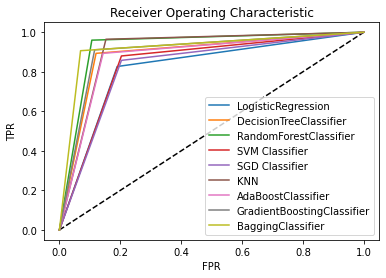

In [141]:
plt.plot([0,1],[0,1], 'k--')
for i in range(0,model_stats.shape[0]):
    plt.plot(model_stats['FPR'][i], model_stats['TPR'][i], label=model_stats['Model'][i])
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("Receiver Operating Characteristic")
plt.show()

Observation - Random Forest Classifier is giving the highest ROC Score 92.67%

# Visualizing Accuracy Score for all Models

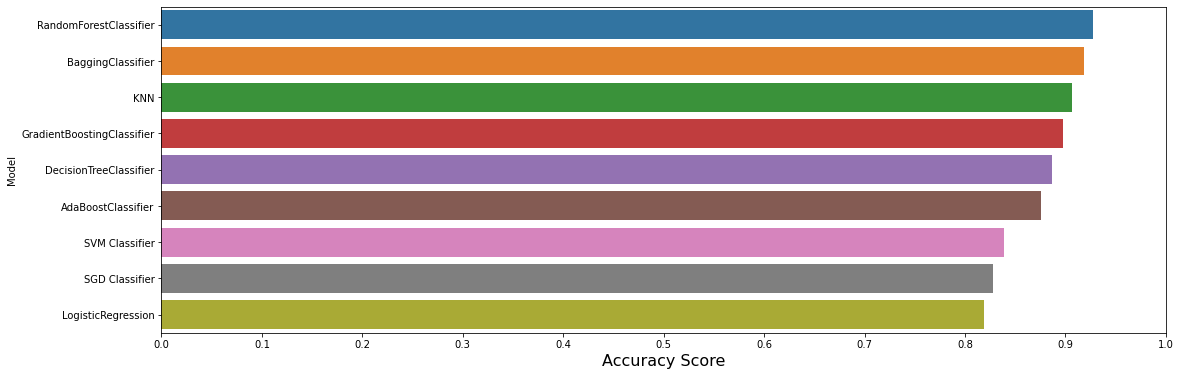

In [143]:
f, axe = plt.subplots(1,1, figsize=(18,6))

model_stats.sort_values(by=['Accuracy Score'], ascending=False, inplace=True)

sns.barplot(x='Accuracy Score', y='Model', data = model_stats, ax = axe)
axe.set_xlabel('Accuracy Score', size=16)
axe.set_ylabel('Model')
axe.set_xlim(0,1.0)
axe.set_xticks(np.arange(0, 1.1, 0.1))
plt.show()

Observation - Random Forest Classifier is giving the highest Accuracy score 92.74%

# Visualizing Cross Validation Score for all Models

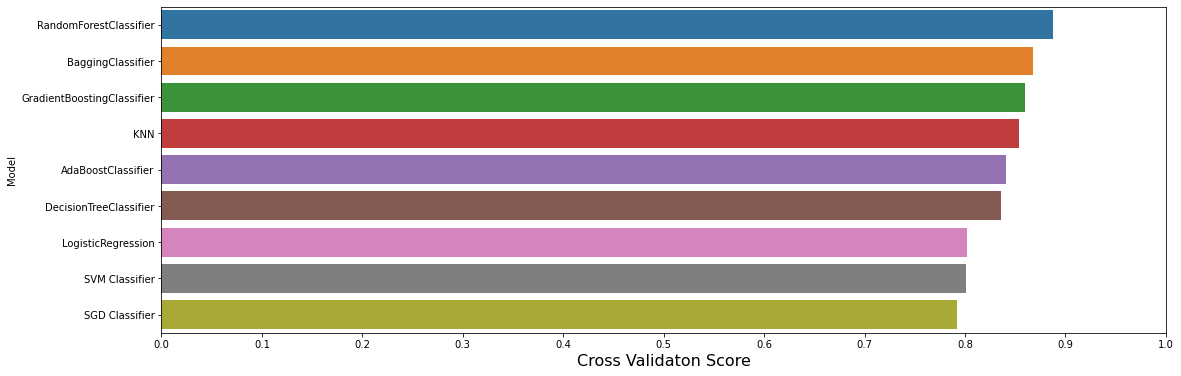

In [142]:
f, axe = plt.subplots(1,1, figsize=(18,6))

model_stats.sort_values(by=['Cross Validation Score'], ascending=False, inplace=True)

sns.barplot(x='Cross Validation Score', y='Model', data = model_stats, ax = axe)
axe.set_xlabel('Cross Validaton Score', size=16)
axe.set_ylabel('Model')
axe.set_xlim(0,1.0)
axe.set_xticks(np.arange(0, 1.1, 0.1))
plt.show()

Observation - Random Forest Classifier is giving the highest Cross validation Score 88.79%

# Visualizing False Predictions for all Models

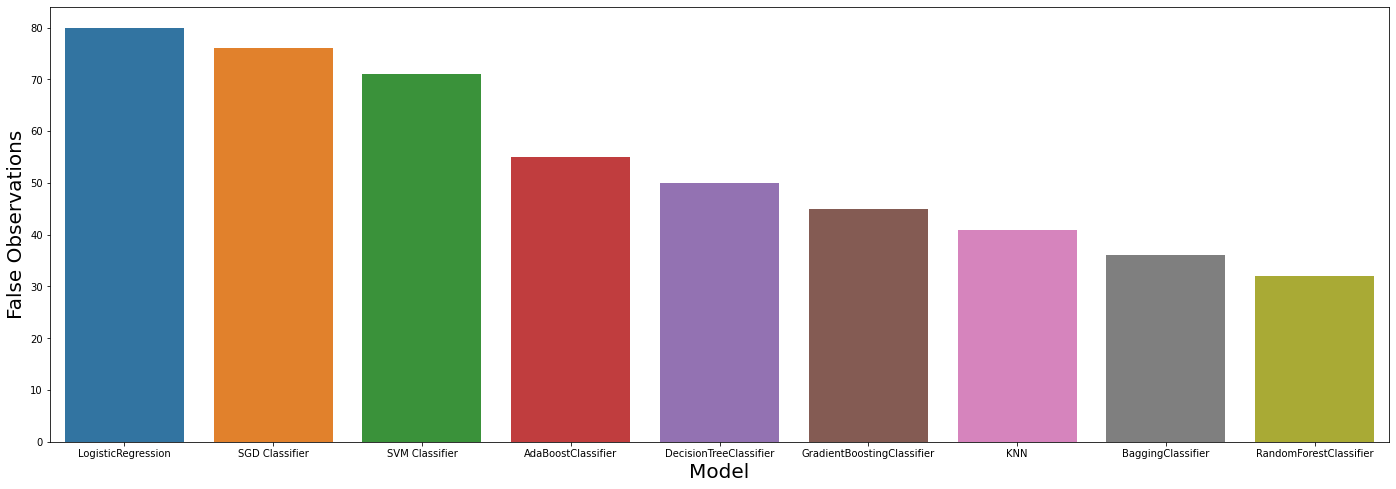

In [144]:
model_stats.sort_values(by=(['Accuracy Score']), ascending=True, inplace=True)

f, axe = plt.subplots(1,1, figsize=(24,8))
sns.barplot(x = model_stats['Model'], y=model_stats['False +ve'] + model_stats['False -ve'], ax = axe)
axe.set_xlabel('Model', size=20)
axe.set_ylabel('False Observations', size=20)

plt.show()

Observation - Random Forest Classifier is giving the least false predictions

Hence, Random Forest Classifier can be choosen as the best model for this problem statement

# Hyper Parameter Tuning with Random Forest Classifier

In [145]:
from sklearn.model_selection import GridSearchCV
parameters = {'criterion':['gini','entropy'],"max_depth":['auto',2,4,6,8,10],'n_estimators':list(range(0,100))}
GCV = GridSearchCV(RandomForestClassifier(),parameters,cv=5,scoring='accuracy')
GCV.fit(x_train,y_train)
GCV.best_params_

{'criterion': 'gini', 'max_depth': 10, 'n_estimators': 76}

Classification Report :
               precision    recall  f1-score   support

           0       0.94      0.90      0.92       216
           1       0.91      0.95      0.93       225

    accuracy                           0.92       441
   macro avg       0.92      0.92      0.92       441
weighted avg       0.92      0.92      0.92       441

Accuracy : 0.9229024943310657
Cross validation score : 0.8906533575317604
Accuracy and CV Score Diff : 0.0322491367993053
ROC AUC Score : 0.9224074074074075


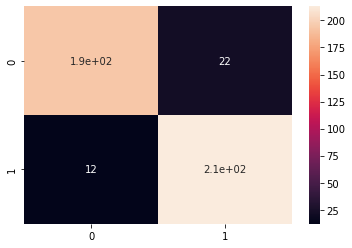

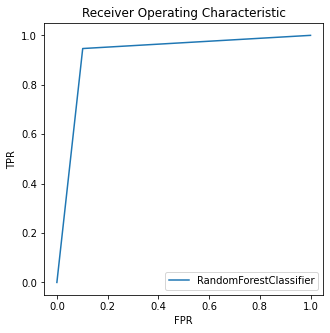

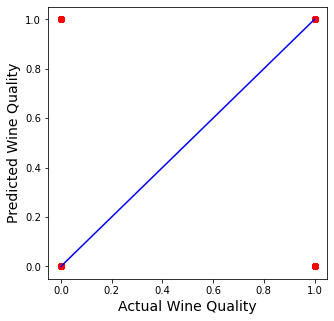

In [151]:
GCV.best_estimator_
rfc = RandomForestClassifier(criterion = 'entropy') 
reg_func(rfc, X, Y,'RandomForestClassifier','rfc')

# Saving the Model

In [152]:
import pickle
filename = 'red_wine_quality_prediction.pkl'
pickle.dump(rfc,open(filename,'wb'))

# Conclusion

In [153]:
loaded_model = pickle.load(open('red_wine_quality_prediction.pkl','rb'))
result = loaded_model.score(x_test, y_test)
print(result*100)

92.29024943310658


Accuracy Score - 92.29% 

In [154]:
conclusion = pd.DataFrame([loaded_model.predict(x_test)[:],y_test[:]],index=['Predicted','Original'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,431,432,433,434,435,436,437,438,439,440
Predicted,0,1,0,1,0,1,0,1,0,1,...,1,1,1,0,1,0,1,0,0,1
Original,0,1,0,1,0,1,0,1,0,0,...,1,1,1,0,1,0,1,0,0,1


# Our model is 92.29% Accurate